# Data Analyst Job Market Analysis

## Motivation
As a 3D artist with an informatics background, I analyze 
the data analyst job market to evaluate a possible career switch 
from 3D artist to data analyst.

## Part 1: USA Market Deep Dive
#### 1.1 Dataset Overview
#### 1.2 Data Cleaning 
#### 1.2.1 Salary Estimate in Min, Max and Middle Salary
#### 1.3 Salary Analysis
#### 1.3.1 Best 10 Cities
#### 1.3.2 Worst 10 Cities
#### 1.3.3 Compare the best and the worst cities in the USA
#### 1.4 Skills Requirements
#### 1.5 Geographic Distribution
#### 1.6 Industry Breakdown

## Part 2: Germany Market Insights
#### 2.1 Data Collection Methodology
#### "Daten manuell erhoben via StepStone, Indeed (Januar 2026)"
#### 2.2 Salary Comparison (USA vs Germany)
#### 2.3 Job Availability

## Part 3: Career Switch Analysis
#### 3.1 3D Artist vs Data Analyst (Germany)
#### 3.2 Transferable Skills
#### 3.3 Conclusions & Next Steps
#### _______________________________________________________________________________________________________

## Part 1: USA Market Deep Dive
### 1.1 Dataset Overview

In [464]:
import pandas as pd
import numpy as np

# 1. USA-Daten (dein Kaggle Dataset)
df_usa = pd.read_csv('data/DataAnalyst.csv',delimiter=',')

df_usa.head()



,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


### 1.2 Data Cleaning 
#### 1.2.1 Salary Estimate in Min, Max and Middle Salary

In [465]:
df_usa_cleaned = df_usa.copy()

df_usa_cleaned['Salary Estimate']

#----------------- Clear Slary Estimate -----------------------------------------------------------------------------

# for sep in ["K", "$", ","]:
#     df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].replace(sep, " ")
# Cleara the Sybmols 'K', '$' and '-'
df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.replace('K', ' ')
df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.replace('$', ' ')
df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.replace('-', '')

# Split the Min Salary Estimate and Max Salary Estimate 
df_usa_cleaned['Min Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.split(' ').str[1]
df_usa_cleaned['Max Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.split(' ').str[3]

# The Null Values from the Min Salary Estimate and Max Salary Estimate, 
# will be settet to the middle Values of the collum
Min_Salary_middle_Value = df_usa_cleaned['Min Salary Estimate'].mode()[0]
df_usa_cleaned.loc[df_usa_cleaned['Min Salary Estimate'].isnull(), 'Min Salary Estimate' ] = Min_Salary_middle_Value

Min_Salary_middle_Value = df_usa_cleaned['Max Salary Estimate'].mode()[0]
df_usa_cleaned.loc[df_usa_cleaned['Max Salary Estimate'].isnull(), 'Max Salary Estimate' ] = Min_Salary_middle_Value

# #df_usa_cleaned.loc[[2149]]
df_usa_cleaned.drop('Salary Estimate', axis=1, inplace=True)
# df_usa_cleaned.drop(df_usa_cleaned[df_usa_cleaned['Min Salary Estimate'].isnull()], axis=1, inplace=True)  

# Set the type of the collums to int
# Multyply by 1000 becose of the K in the original Salary Estimate
df_usa_cleaned['Min Salary Estimate'] = df_usa_cleaned['Min Salary Estimate'].astype(int) * 1000
df_usa_cleaned['Max Salary Estimate'] = df_usa_cleaned['Max Salary Estimate'].astype(int) * 1000

# Calculate the Aqvarage Salary
df_usa_cleaned['Average Salary Estimate'] = (df_usa_cleaned['Min Salary Estimate'] + df_usa_cleaned['Max Salary Estimate'] ) / 2  



#----------------- Clear Location -----------------------------------------------------------------------------

# Stadt extrahieren (vor dem Komma)
df_usa_cleaned['City'] = df_usa_cleaned['Location'].str.split(',').str[0].str.strip()

# State extrahieren (nach dem Komma)
df_usa_cleaned['State'] = df_usa_cleaned['Location'].str.split(',').str[1].str.strip()

# Converrt to String
# df_usa_cleaned['City'] = df_usa_cleaned['City'].astype('string')
# df_usa_cleaned['State'] = df_usa_cleaned['State'].astype('string')

# Delewte the Location Collum
# df_usa_cleaned.drop('Location', axis=1, inplace=True)
df_usa_cleaned.info()

# Prüfen
# print("\nBeispiele:")
# print(df_usa_cleaned[['Location', 'City', 'State']].head(10))

# Remote-Jobs identifizieren
df_usa_cleaned['Is_Remote'] = df_usa_cleaned['Location'].str.contains('Remote', case=False, na=False)



# df_usa_cleaned.info()
df_usa_cleaned.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2253 non-null   int64  
 1   Job Title                2253 non-null   object 
 2   Job Description          2253 non-null   object 
 3   Rating                   2253 non-null   float64
 4   Company Name             2252 non-null   object 
 5   Location                 2253 non-null   object 
 6   Headquarters             2253 non-null   object 
 7   Size                     2253 non-null   object 
 8   Founded                  2253 non-null   int64  
 9   Type of ownership        2253 non-null   object 
 10  Industry                 2253 non-null   object 
 11  Sector                   2253 non-null   object 
 12  Revenue                  2253 non-null   object 
 13  Competitors              2253 non-null   object 
 14  Easy Apply              

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Sector,Revenue,Competitors,Easy Apply,Min Salary Estimate,Max Salary Estimate,Average Salary Estimate,City,State,Is_Remote
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,...,Non-Profit,$100 to $500 million (USD),-1,True,37000,66000,51500.0,New York,NY,False


#### 1.3 Salary Analysis

In [466]:
# Gehälter:
# Top 10 bestbezahlte Städte

# Durchschnittsgehalt pro Stadt berechnen
# **Beispiel:**
# groupby() :
# Vorher (einzelne Zeilen):              # Nachher (gruppiert):
# Job 1: New York, $70,000               # New York: [$70,000, $80,000, $90,000]
# Job 4: Boston, $75,000                 # Boston: [$65,000, $75,000]
# Job 5: New York, $90,000

# agg() :                                      
# - Nimm die Spalte `'Max Salary Estimate'`   # New York: [$70,000, $80,000, $90,000]               # Boston: [$65,000, $75,000]
# - Berechne **zwei Sachen**:                 #   → mean = (70000 + 80000 + 90000) / 3 = $80,000    #   → mean = (65000 + 75000) / 2 = $70,000
#   - `'mean'` = Durchschnitt                 #   → count = 3 Jobs                                  #   → count = 2 Jobs
#   - `'count'` = Wie viele Jobs

city_salary = df_usa_cleaned.groupby('City').agg({
    'Average Salary Estimate': ['mean', 'count']
}).round(0)

# Nur Städte mit mindestens 5 Jobs berücksichtigen
# Rename Columns
city_salary.columns = ['Avg_Salary', 'Job_Count']
# Add the cities with min 5 Jobs
city_salary = city_salary[city_salary['Job_Count'] >= 5]
#Sort the highter Salary first  
city_salary = city_salary.sort_values('Avg_Salary', ascending=False)

# Save the first 10 Citys with top salarys
top_10_cities = city_salary.head(10)

# Print TOP 10
print("\n" + "="*80)
print("TOP 10 BESTBEZAHLTE STÄDTE (min. 5 Jobs):")
print("="*80)
print(top_10_cities)




TOP 10 BESTBEZAHLTE STÄDTE (min. 5 Jobs):
               Avg_Salary  Job_Count
City                                
San Jose         108855.0         38
Cupertino        105885.0         13
Santa Clara      104636.0         22
Sunnyvale        102781.0         16
Menlo Park       101864.0         11
San Francisco     99273.0        119
Redwood City      97083.0         12
Fremont           97000.0          5
Palo Alto         93929.0         14
Oakland           92864.0         11


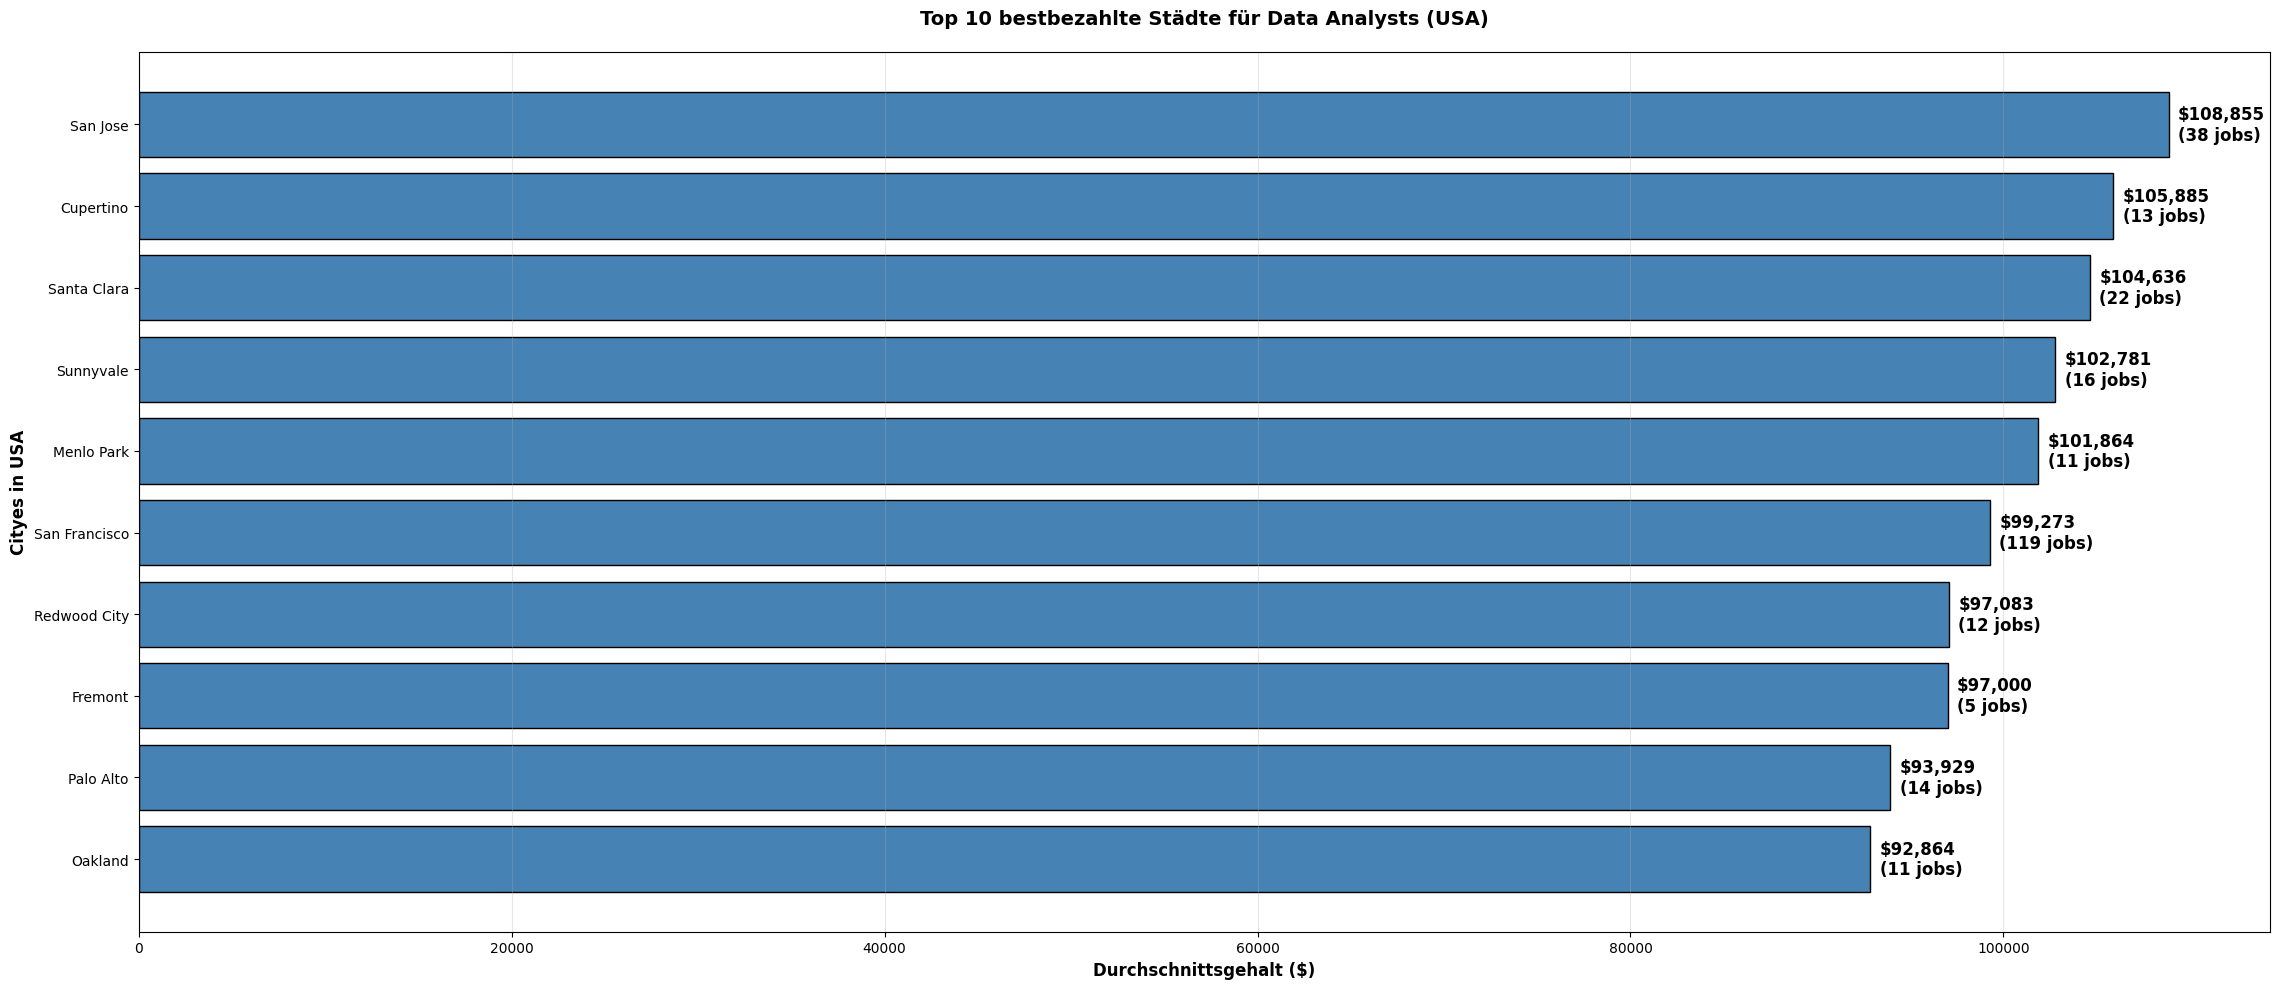


✅ Grafik gespeichert als 'top_10_cities_salary.png'


In [467]:
import matplotlib.pyplot as plt
import seaborn as sns

# Erstelle Balkendiagramm
plt.figure(figsize=(23, 10))

# Daten vorbereiten
best_cities = top_10_cities.index.tolist()
best_salaries = top_10_cities['Avg_Salary'].values
job_counts = top_10_cities['Job_Count'].values

# Balkendiagramm
bars = plt.barh(best_cities, best_salaries, color='steelblue', edgecolor='black')

# Jobnummer als Text hinzufügen
for i, (bar, count, salary) in enumerate(zip(bars, job_counts, best_salaries)):
    plt.text(salary + 500, i, f'${salary:,.0f}\n({int(count)} jobs)', 
             va='center', fontsize=12, fontweight='bold')

plt.xlabel('Durchschnittsgehalt ($)', fontsize=12, fontweight='bold')
plt.ylabel('Cityes in USA', fontsize=12, fontweight='bold')

plt.title('Top 10 bestbezahlte Städte für Data Analysts (USA)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.gca().invert_yaxis()  # Höchste oben

plt.savefig('top_10_cities_salary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Grafik gespeichert als 'top_10_cities_salary.png'")

In [468]:
# Calkullating the last 10 payed citys

worst_10_cities = city_salary.tail(10)

# Print LAST 10
print("\n" + "="*80)
print("WARST 10 BEZAHLTE STÄDTE (min. 5 Jobs):")
print("="*80)
print(last_10_cities)  


WARST 10 BEZAHLTE STÄDTE (min. 5 Jobs):
                Avg_Salary  Job_Count
City                                 
Pasadena           56500.0          9
Horsham            56062.0          8
Jacksonville       56000.0         19
Arlington          54625.0          8
Dallas             50576.0         66
Indianapolis       47500.0         17
Columbus           45379.0         29
Gainesville        42000.0          7
Lehi               38200.0          5
Salt Lake City     37659.0         22


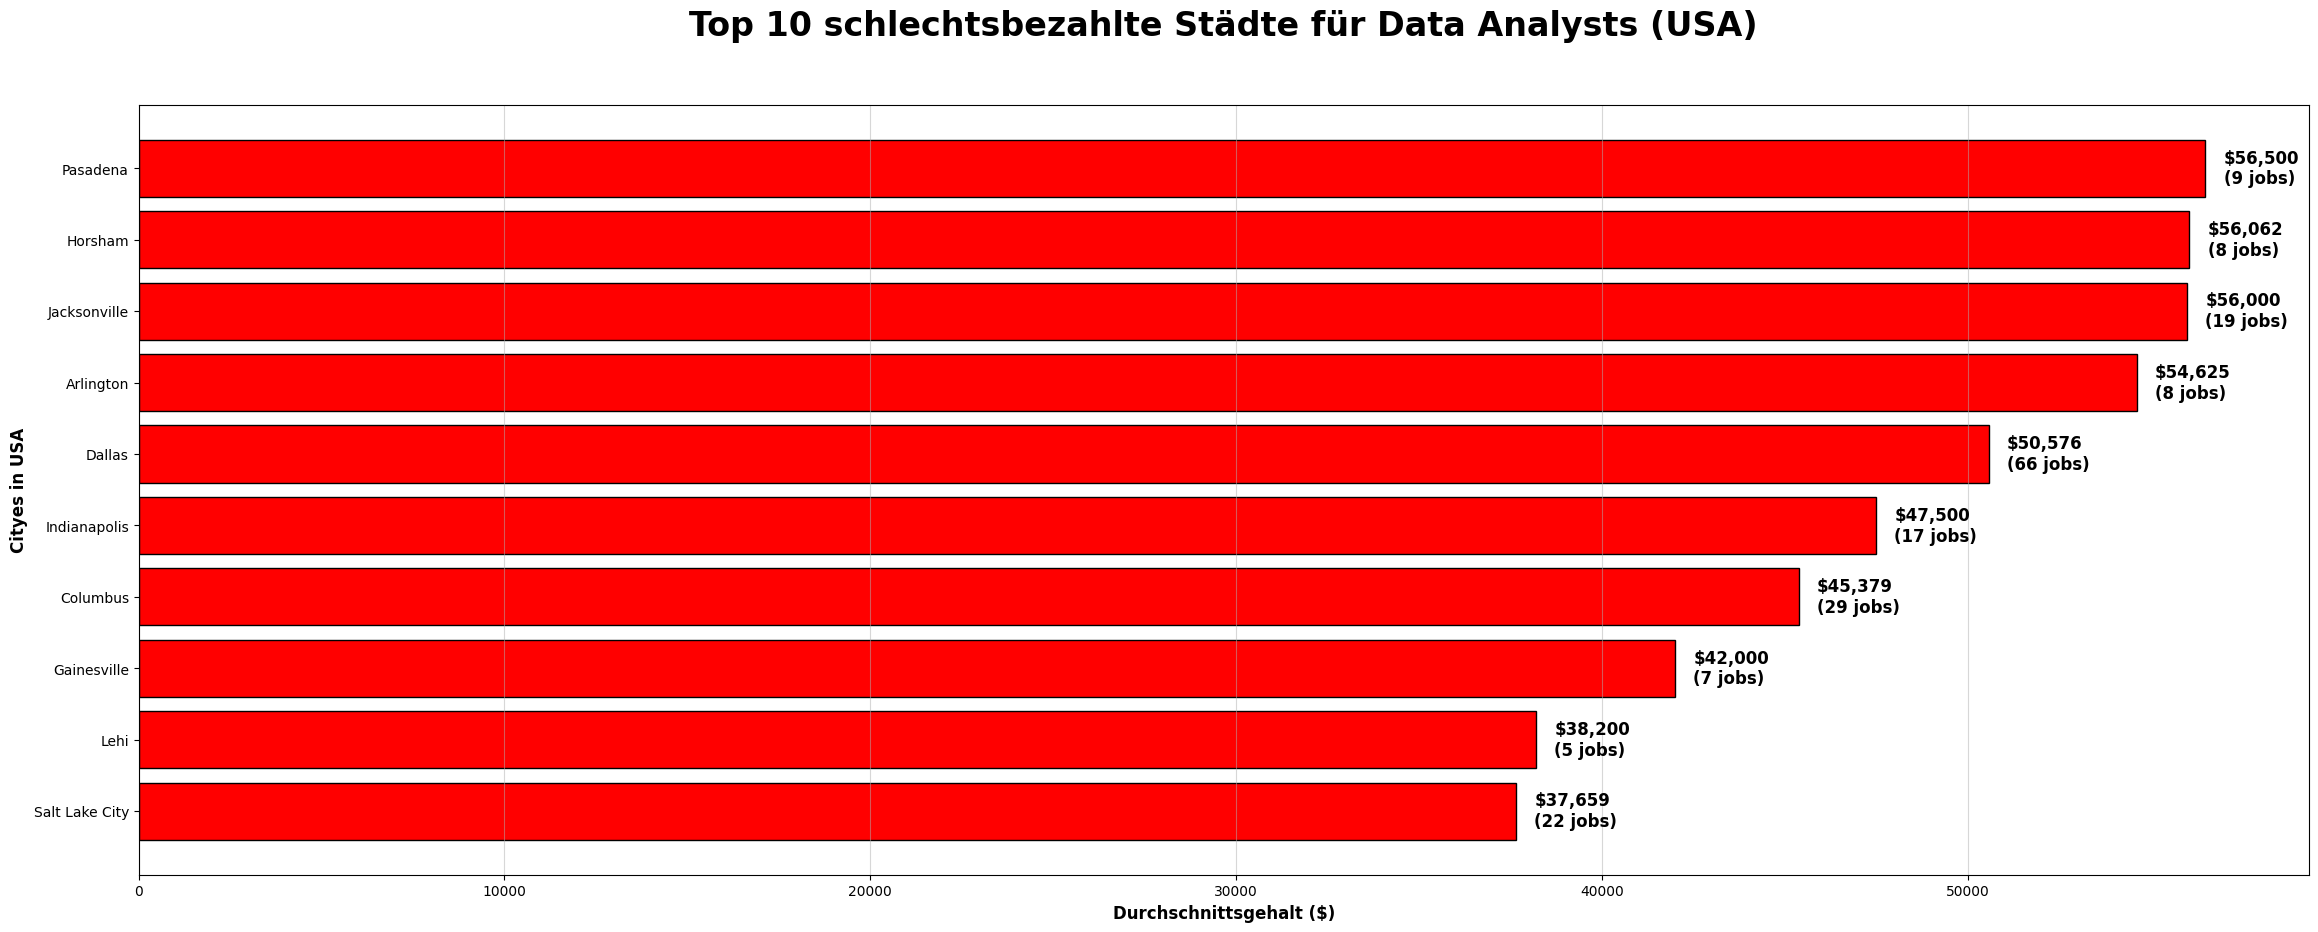

In [469]:
# Erstelle Balkendiagramm
plt.figure(figsize=(28, 10))

# Daten vorbereiten
warst_cities = worst_10_cities.index.tolist()
warst_salaries = worst_10_cities['Avg_Salary'].values
job_counts = worst_10_cities['Job_Count'].values


# Balkendiagramm
bars = plt.barh(warst_cities, warst_salaries, color='red', edgecolor='black')


# Jobnummer als Text hinzufügen
for i, (bar, count, salary) in enumerate(zip(bars, job_counts, warst_salaries)):
    plt.text(salary + 500, i, f'${salary:,.0f}\n({int(count)} jobs)', 
             va='center', fontsize=12, fontweight='bold')

plt.title('Top 10 schlechtsbezahlte Städte für Data Analysts (USA)', fontsize=24, fontweight='bold', pad=50, y=1.0)    

plt.xlabel('Durchschnittsgehalt ($)', fontsize=12, fontweight='bold')
plt.ylabel('Cityes in USA', fontsize=12, fontweight='bold')

plt.grid(axis='x', alpha=0.5 )

plt.gca().invert_yaxis()  # Höchste oben

plt.savefig('low_10_cities_salary.png', dpi=300, bbox_inches='tight')

plt.show()


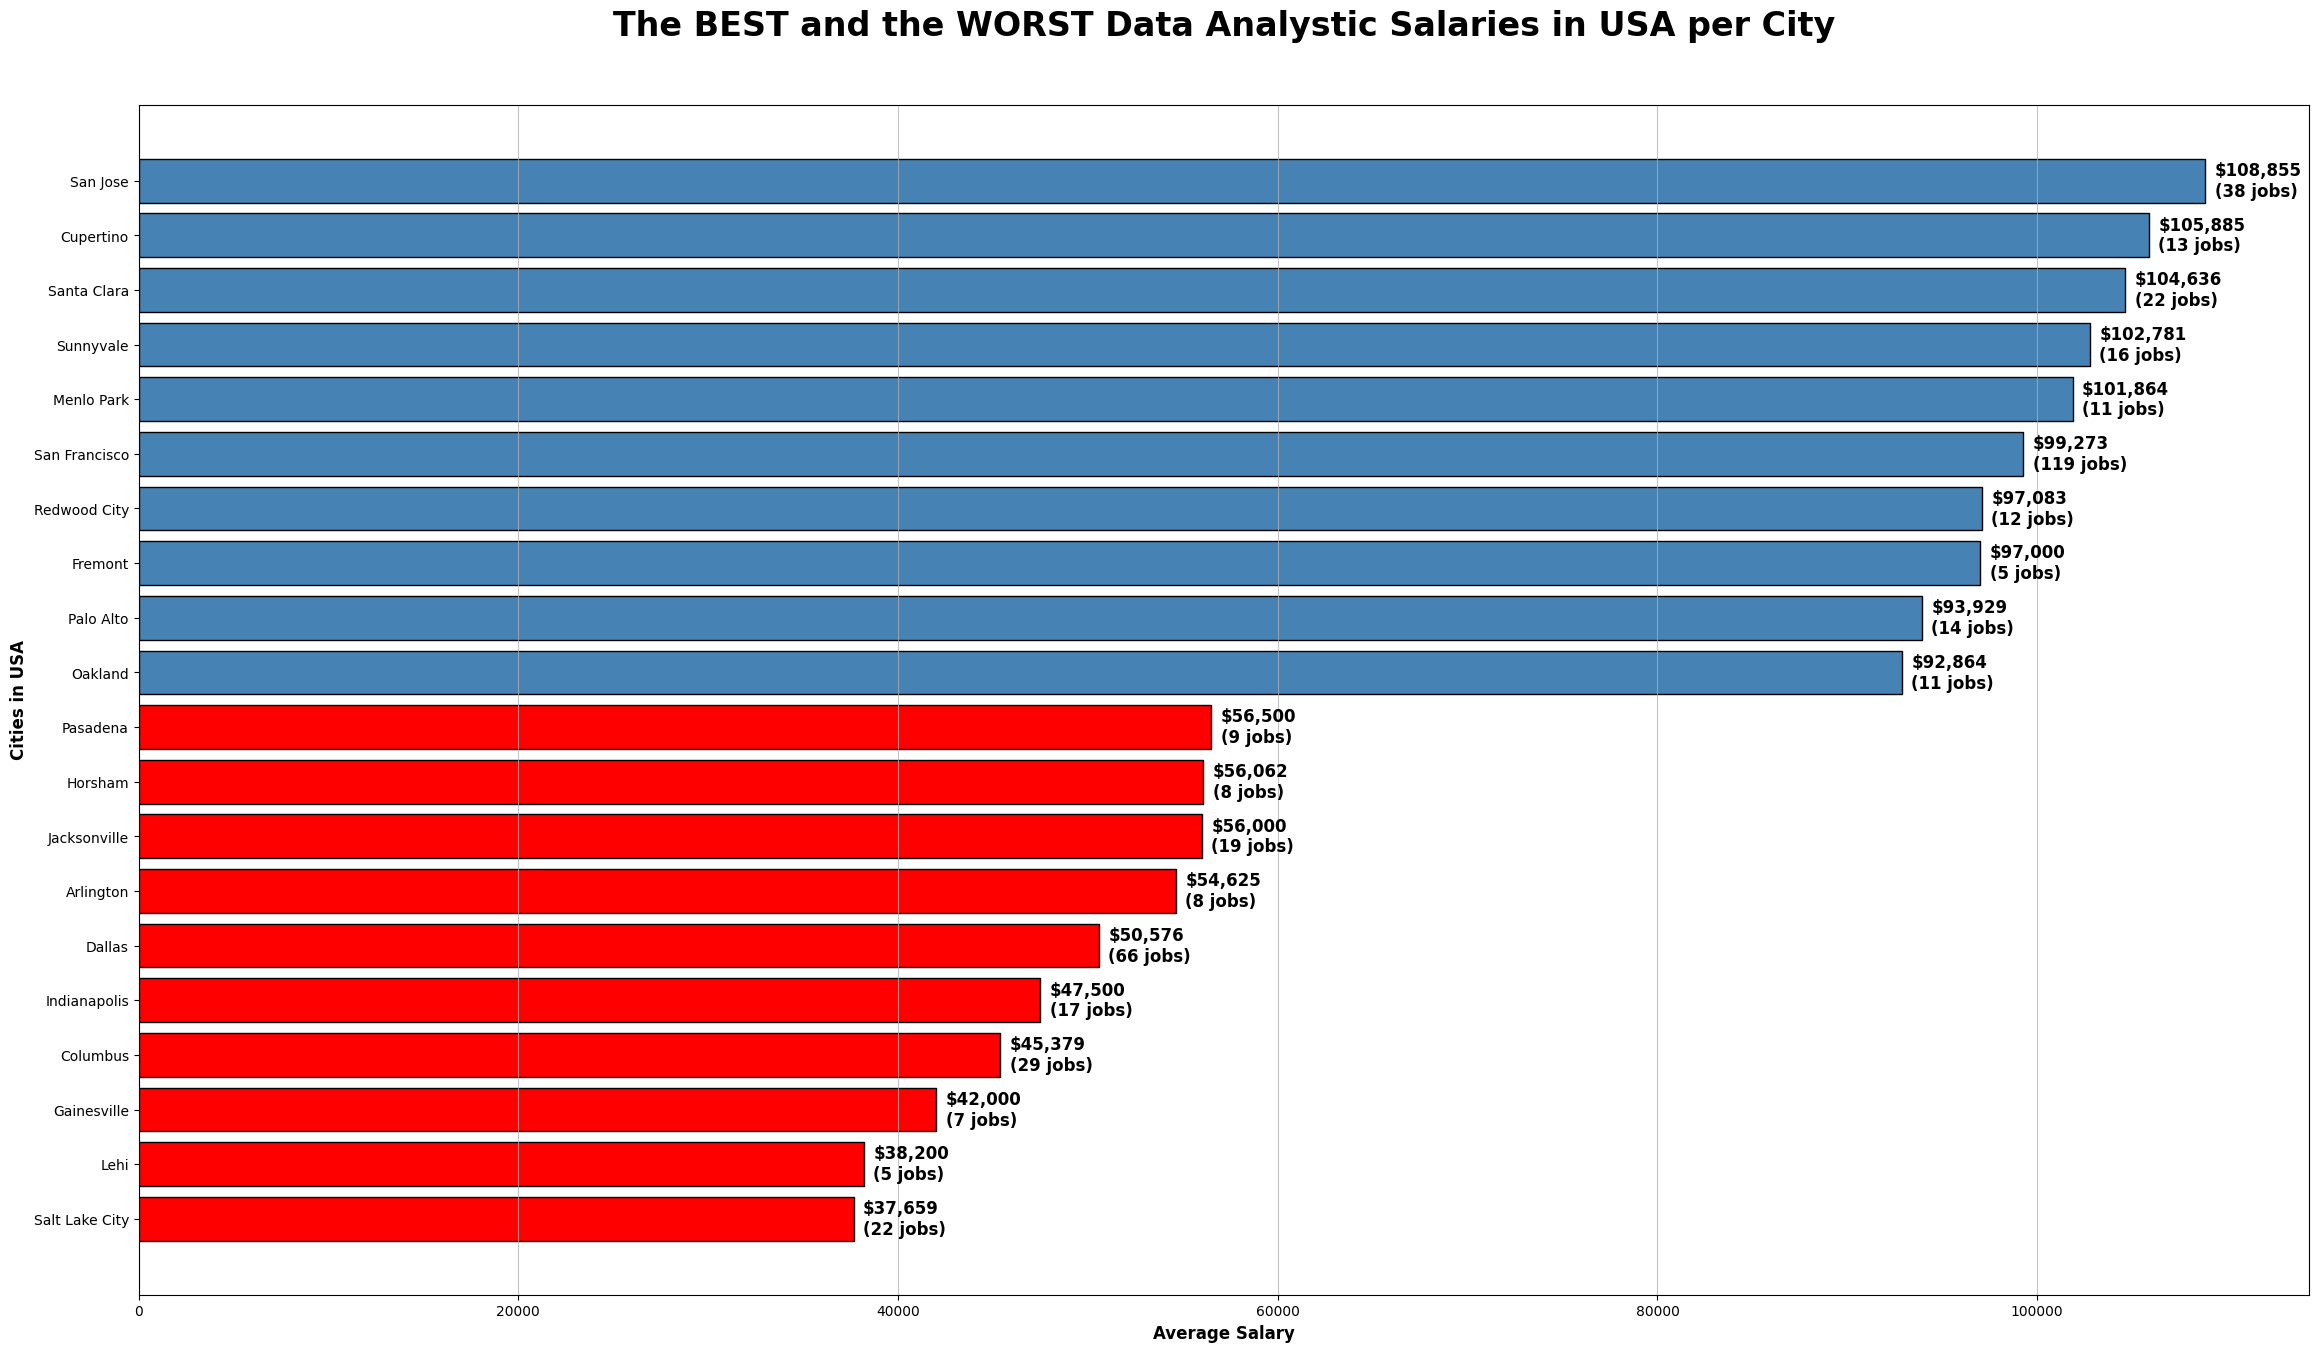

In [470]:
# Shaw the best and the worst citeys in one diagram 
plt.figure(figsize=(28, 10))
plt.subplots_adjust(top=1.3)

#Data
# best_worst_cities = best_cities + worst_10_cities
df_best_and_worst_cities = pd.concat([top_10_cities, worst_10_cities])

best_and_worst_cities = df_best_and_worst_cities.index.tolist()
best_and_worst_salaries = df_best_and_worst_cities['Avg_Salary'].values
best_and_worst_job_counts = df_best_and_worst_cities['Job_Count'].values

# Farbe pro Bar definieren
colors = ['red' if i >= 10 else 'steelblue' for i in range(len(best_and_worst_cities))]

# Balkendiagramm
bars = plt.barh(best_and_worst_cities, best_and_worst_salaries, color=colors, edgecolor='black')

# Jobnummer als Text hinzufügen
for i, (bar, count, salary) in enumerate(zip(bars, best_and_worst_job_counts, best_and_worst_salaries)):
    plt.text(salary + 500, i, f'${salary:,.0f}\n({int(count)} jobs)', 
             va='center', fontsize=12, fontweight='bold')


plt.title('The BEST and the WORST Data Analystic Salaries in USA per City', fontsize='24', fontweight='bold', pad=50, y=1)

plt.xlabel('Average Salary', fontsize = "12", fontweight='bold')
plt.ylabel('Cities in USA', fontsize = "12", fontweight='bold')

plt.grid(axis='x', alpha=0.75)

plt.gca().invert_yaxis()

plt.show()


In [471]:
# Compare the city with the best and warst salary in USA

# best_worst_cities = best_cities + worst_10_cities

top_city_name = top_10_cities.index[0]
top_city_salary = top_10_cities['Avg_Salary'].max()
# top_city_job_counts = top_10_cities[top_city_name]

worst_city_name = worst_10_cities.index[9]
worst_city_salary = worst_10_cities['Avg_Salary'].min()

procent = (worst_city_salary / top_city_salary) * 100
procent = round(procent, 2)

print("-"*90)
print("Compare the best and the worst cities in the USA ")
print("-"*90)
print('The best salaries for data analyst in USA are in ' + top_city_name + ' with salarie of ' + top_city_salary.astype('str') + '.')
print('The worst salaries for data analyst in USA are in ' + worst_city_name + ' with salarie of ' + worst_city_salary.astype('str') + '.')
print('The salary in' + worst_city_name +' is '  +  procent.astype('str') + '% from the salarie of the best salary city - ' + top_city_name + '.')



------------------------------------------------------------------------------------------
Compare the best and the worst cities in the USA 
------------------------------------------------------------------------------------------
The best salaries for data analyst in USA are in San Jose with salarie of 108855.0.
The worst salaries for data analyst in USA are in Salt Lake City with salarie of 37659.0.
The salary inSalt Lake City is 34.6% from the salarie of the best salary city - San Jose.


1.4 Skills Requirements

1.4.1 Skills aus Job Descriptions extrahieren

In [472]:
# Liste der wichtigsten Data Analyst Skills
data_skills = {
    # Programming
    'python': 'Python',
    'r programming|\\br\\b': 'R',
    'sql': 'SQL',
    'sas': 'SAS',
    'java': 'Java',
    
    # Visualisierung
    'tableau': 'Tableau',
    'power bi|powerbi': 'Power BI',
    'looker': 'Looker',
    'qlik': 'Qlik',
    
    # Python Libraries
    'pandas': 'Pandas',
    'numpy': 'NumPy',
    'matplotlib': 'Matplotlib',
    'seaborn': 'Seaborn',
    'plotly': 'Plotly',
    
    # Datenbanken
    'mysql': 'MySQL',
    'postgresql|postgres': 'PostgreSQL',
    'mongodb': 'MongoDB',
    'oracle': 'Oracle',
    
    # Cloud & Big Data
    'aws': 'AWS',
    'azure': 'Azure',
    'gcp|google cloud': 'Google Cloud',
    'hadoop': 'Hadoop',
    'spark': 'Spark',
    
    # Tools
    'excel': 'Excel',
    'google analytics': 'Google Analytics',
    'git': 'Git',
    'jupyter': 'Jupyter',
    
    # Statistik & ML
    'machine learning|\\bml\\b': 'Machine Learning',
    'statistics|statistical': 'Statistics',
    'data mining': 'Data Mining',
    'predictive modeling': 'Predictive Modeling',
    'a/b testing|ab testing': 'A/B Testing'
}

# Funktion zum Zählen
# Zählt wie oft jeder Skill in den Job Descriptions vorkommt
def count_skills(job_descriptions):

    skill_counts = {}
    
    for pattern, skill_name in data_skills.items():
        # Zähle in wie vielen Jobs der Skill vorkommt
        count = job_descriptions.str.contains(pattern, case=False, na=False, regex=True).sum()
        if count > 0:
            skill_counts[skill_name] = count
    
    return skill_counts

# Skills zählen
print("Analysiere Skills in Job Descriptions...")
skill_counts = count_skills(df_usa_cleaned['Job Description'])

# Als DataFrame
skills_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['Count'])
skills_df['Percentage'] = (skills_df['Count'] / len(df_usa_cleaned) * 100).round(1)
skills_df = skills_df.sort_values('Count', ascending=False)

print("\n" + "="*80)
print("TOP 20 GEFRAGTE SKILLS:")
print("="*80)
print(skills_df.head(20))

Analysiere Skills in Job Descriptions...

TOP 20 GEFRAGTE SKILLS:
                  Count  Percentage
SQL                1389        61.7
Excel              1354        60.1
Statistics          839        37.2
Python              637        28.3
Tableau             620        27.5
R                   464        20.6
SAS                 411        18.2
Git                 298        13.2
AWS                 275        12.2
Data Mining         257        11.4
Power BI            248        11.0
Oracle              246        10.9
Java                204         9.1
Machine Learning    192         8.5
Hadoop              136         6.0
Looker              108         4.8
Spark                89         4.0
MySQL                82         3.6
Qlik                 76         3.4
Azure                64         2.8


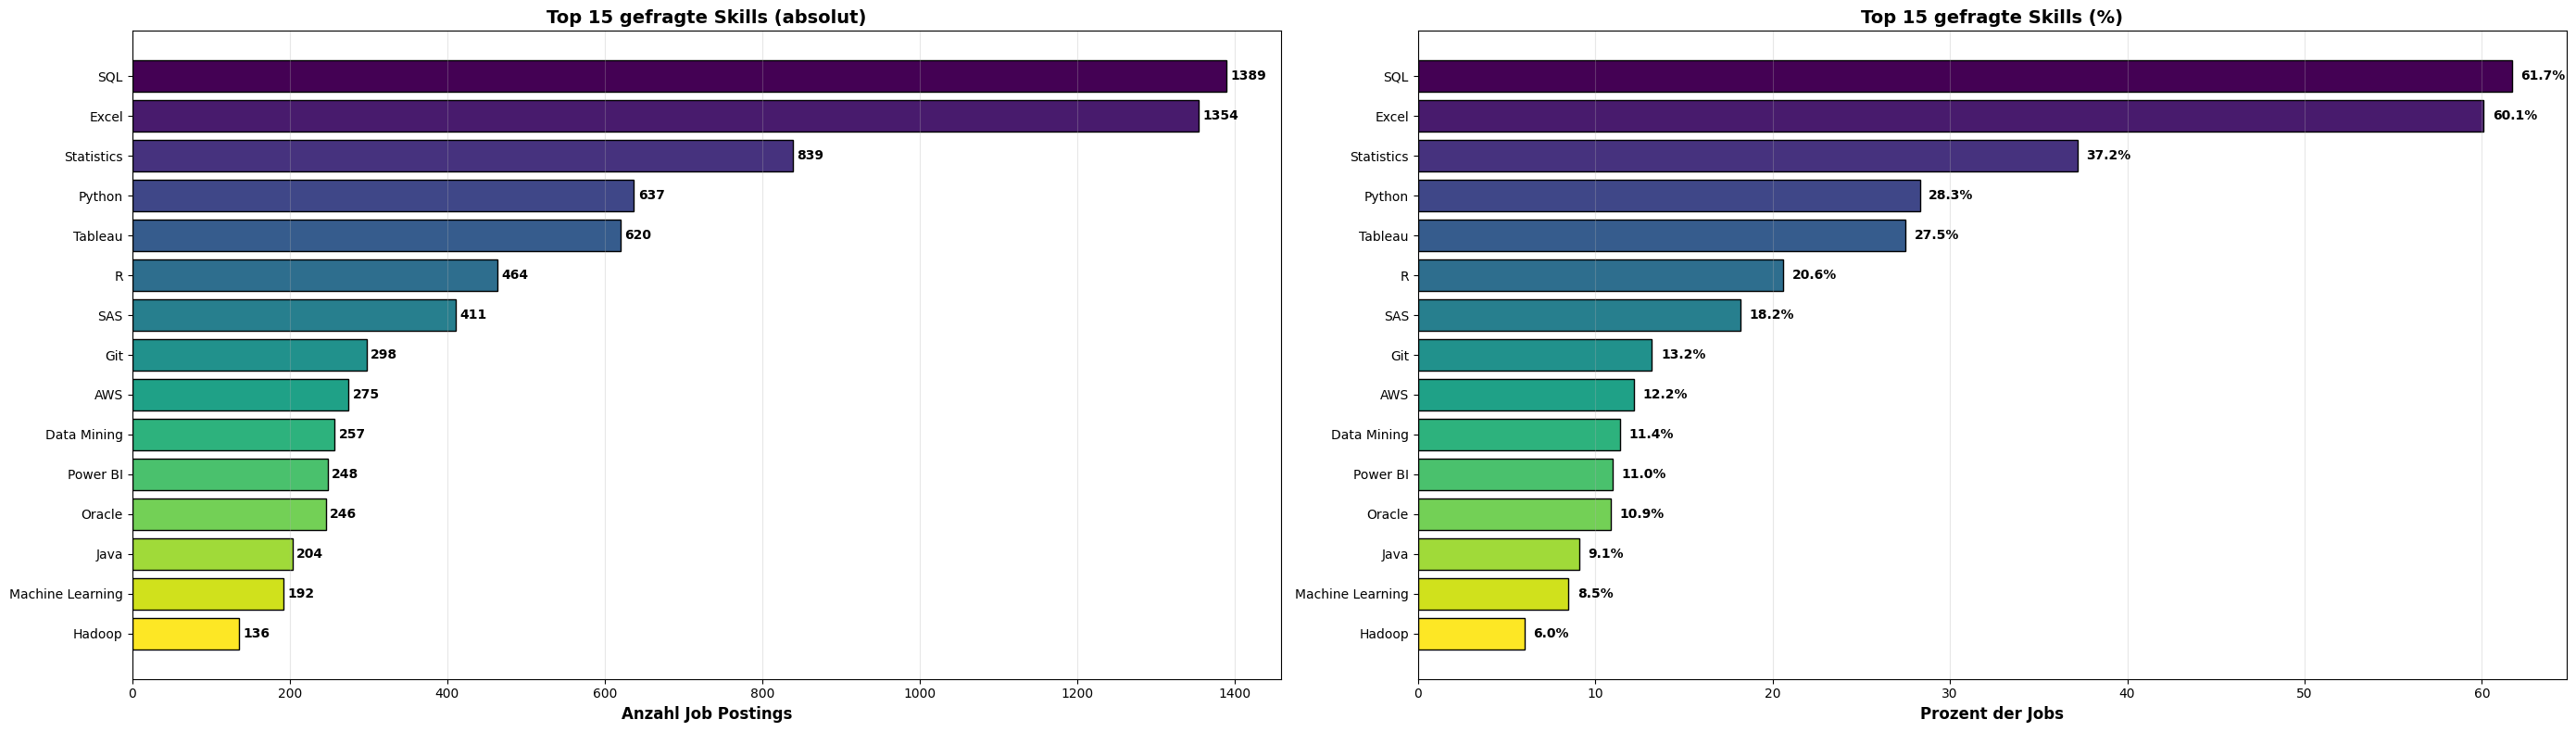


✅ Grafik gespeichert als 'top_skills_requirements.png'


In [473]:
# Visualisierung - Top 15 Skills
fig, axes = plt.subplots(1, 2, figsize=(28, 8))

# Plot 1: Absolute Zahlen --------------------------------------------------------------------------------
top_15 = skills_df.head(15)
colors = plt.cm.viridis(np.linspace(0, 1, 15))

axes[0].barh(top_15.index, top_15['Count'], color=colors, edgecolor='black')
axes[0].set_xlabel('Anzahl Job Postings', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 gefragte Skills (absolut)', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Werte anzeigen 
for i, (idx, row) in enumerate(top_15.iterrows()):
    axes[0].text(row['Count'] + 5, i, f"{int(row['Count'])}", 
                va='center', fontsize=10, fontweight='bold')

# Plot 2: Prozentual ------------------------------------------------------------------------------------
axes[1].barh(top_15.index, top_15['Percentage'], color=colors, edgecolor='black')
axes[1].set_xlabel('Prozent der Jobs', fontsize=12, fontweight='bold')
axes[1].set_title('Top 15 gefragte Skills (%)', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

# Prozente anzeigen
for i, (idx, row) in enumerate(top_15.iterrows()):
    axes[1].text(row['Percentage'] + 0.5, i, f"{row['Percentage']:.1f}%", 
                va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('top_skills_requirements.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Grafik gespeichert als 'top_skills_requirements.png'")

In [474]:
# Definiere Schwellenwerte
must_have_threshold = 50  # In mehr als 50% der Jobs
nice_to_have_threshold = 20  # In 20-50% der Jobs

must_have = skills_df[skills_df['Percentage'] >= must_have_threshold]
nice_to_have = skills_df[(skills_df['Percentage'] >= nice_to_have_threshold) & 
                         (skills_df['Percentage'] < must_have_threshold)]
optional = skills_df[skills_df['Percentage'] < nice_to_have_threshold]

print("\n" + "="*80)
print(" MUST-HAVE SKILLS (>50% der Jobs):")
print("="*80)
if len(must_have) > 0:
    print(must_have)
else:
    print("Keine Skills in >50% der Jobs")

print("\n" + "="*80)
print(" NICE-TO-HAVE SKILLS (20-50% der Jobs):")
print("="*80)
print(nice_to_have.head(10))

print("\n" + "="*80)
print(" OPTIONAL SKILLS (<20% der Jobs):")
print("="*80)
print(f"Anzahl: {len(optional)} Skills")


 MUST-HAVE SKILLS (>50% der Jobs):
       Count  Percentage
SQL     1389        61.7
Excel   1354        60.1

 NICE-TO-HAVE SKILLS (20-50% der Jobs):
            Count  Percentage
Statistics    839        37.2
Python        637        28.3
Tableau       620        27.5
R             464        20.6

 OPTIONAL SKILLS (<20% der Jobs):
Anzahl: 26 Skills


In [475]:
# Welche Skills werden oft zusammen gefordert?
# Prüft wie oft zwei Skills zusammen gefordert werden
def check_skill_combination(df, skill1, skill2):

    pattern1 = [p for p, s in data_skills.items() if s == skill1][0]
    pattern2 = [p for p, s in data_skills.items() if s == skill2][0]
    
    has_both = df['Job Description'].str.contains(pattern1, case=False, na=False, regex=True) & \
               df['Job Description'].str.contains(pattern2, case=False, na=False, regex=True)
    
    return has_both.sum()

# Wichtige Kombinationen prüfen
combinations = [
    ('Python', 'SQL'),
    ('Tableau', 'SQL'),
    ('Python', 'Tableau'),
    ('Excel', 'SQL'),
    ('Python', 'Pandas'),
    ('R', 'SQL'),
    ('Power BI', 'SQL'),
    ('Machine Learning', 'Python')
]

print("\n" + "="*80)
print("HÄUFIGE SKILL-KOMBINATIONEN:")
print("="*80)

combo_results = []
for skill1, skill2 in combinations:
    if skill1 in skills_df.index and skill2 in skills_df.index:
        count = check_skill_combination(df_usa_cleaned, skill1, skill2)
        percentage = (count / len(df_usa_cleaned) * 100)
        combo_results.append({
            'Kombination': f'{skill1} + {skill2}',
            'Count': count,
            'Percentage': round(percentage, 1)
        })

combo_df = pd.DataFrame(combo_results).sort_values('Count', ascending=False)
print(combo_df.to_string(index=False))


HÄUFIGE SKILL-KOMBINATIONEN:
              Kombination  Count  Percentage
              Excel + SQL    888        39.4
             Python + SQL    561        24.9
            Tableau + SQL    531        23.6
                  R + SQL    377        16.7
         Python + Tableau    314        13.9
           Power BI + SQL    203         9.0
Machine Learning + Python    137         6.1
          Python + Pandas     40         1.8


#### 1.5 Geographic Distribution
##### 1.5.1 Top 10 Städte


TOP 10 STÄDTE (nach Anzahl Jobs):
City
New York         310
Chicago          130
San Francisco    119
Austin            81
Los Angeles       80
Charlotte         78
Houston           72
Dallas            66
San Diego         62
Philadelphia      56
Name: count, dtype: int64


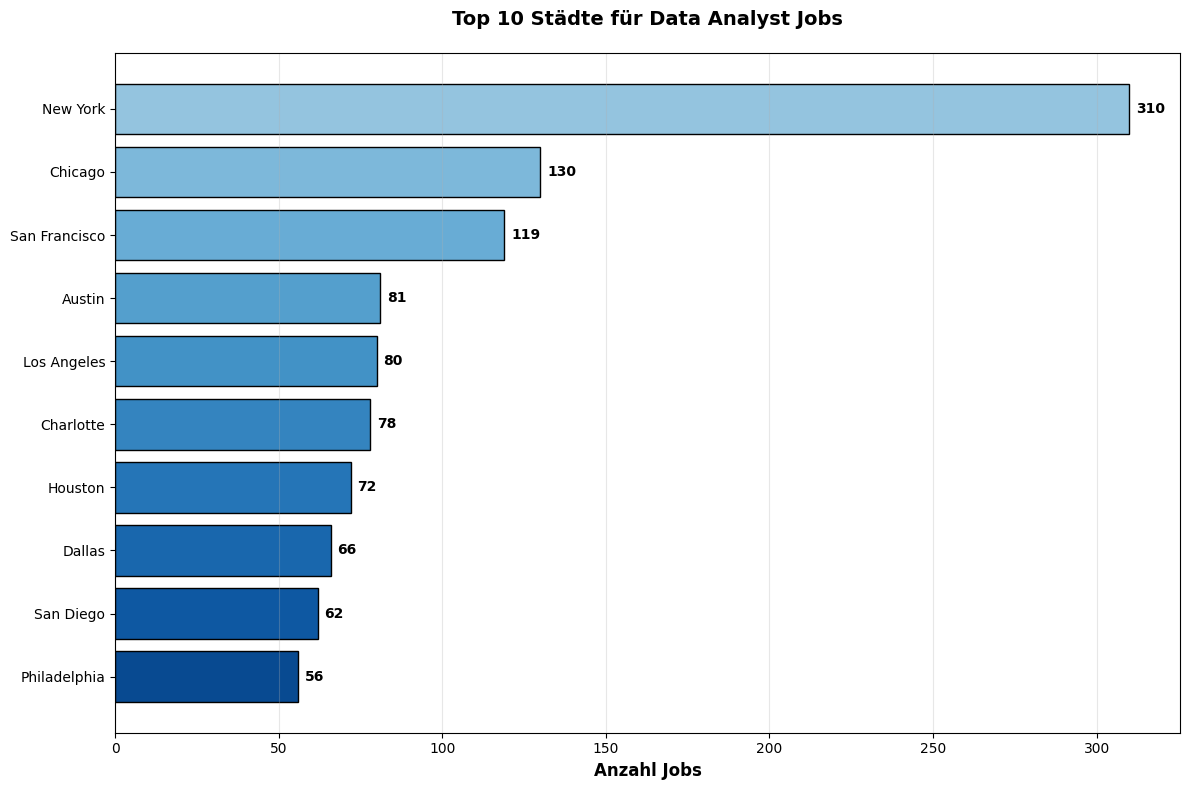


 Grafik gespeichert als 'top_10_cities_jobs.png'


In [476]:
# Anzahl Jobs pro Stadt
city_counts = df_usa_cleaned['City'].value_counts().head(10)

print("\n" + "="*80)
print("TOP 10 STÄDTE (nach Anzahl Jobs):")
print("="*80)
print(city_counts)

# Visualisierung
plt.figure(figsize=(12, 8))

colors = plt.cm.Blues(np.linspace(0.4, 0.9, 10))
bars = plt.barh(city_counts.index, city_counts.values, color=colors, edgecolor='black')

plt.xlabel('Anzahl Jobs', fontsize=12, fontweight='bold')
plt.title('Top 10 Städte für Data Analyst Jobs', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

# Zahlen anzeigen
for i, (city, count) in enumerate(city_counts.items()):
    plt.text(count + 2, i, f'{int(count)}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('top_10_cities_jobs.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Grafik gespeichert als 'top_10_cities_jobs.png'")

##### 1.5.2 Top 10 States


TOP 10 STATES (nach Anzahl Jobs):
State
CA    626
TX    394
NY    345
IL    164
PA    114
AZ     97
NC     90
CO     88
NJ     86
WA     54
Name: count, dtype: int64


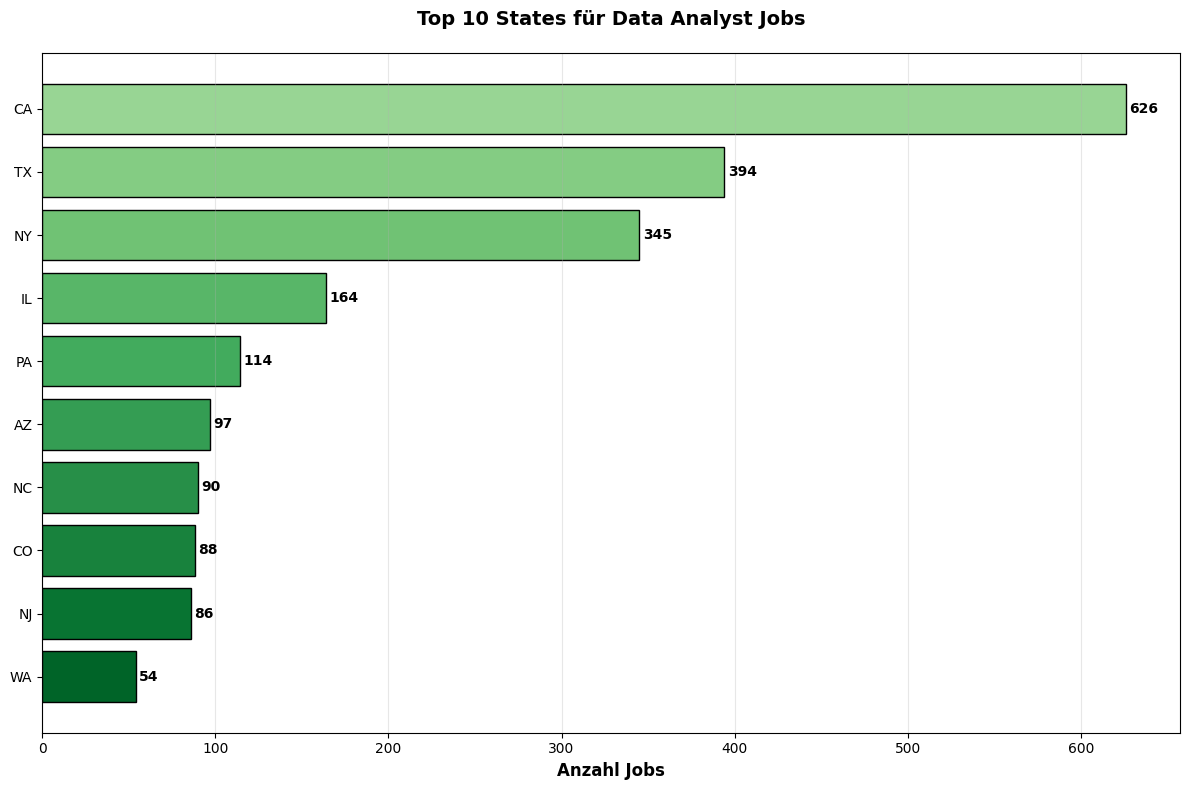


 Grafik gespeichert als 'top_10_states_jobs.png'


In [477]:
# Anzahl Jobs pro State
state_counts = df_usa_cleaned['State'].value_counts().head(10)

print("\n" + "="*80)
print("TOP 10 STATES (nach Anzahl Jobs):")
print("="*80)
print(state_counts)

# Visualisierung
plt.figure(figsize=(12, 8))

colors = plt.cm.Greens(np.linspace(0.4, 0.9, 10))
bars = plt.barh(state_counts.index, state_counts.values, color=colors, edgecolor='black')

plt.xlabel('Anzahl Jobs', fontsize=12, fontweight='bold')
plt.title('Top 10 States für Data Analyst Jobs', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

for i, (state, count) in enumerate(state_counts.items()):
    plt.text(count + 2, i, f'{int(count)}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('top_10_states_jobs.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Grafik gespeichert als 'top_10_states_jobs.png'")

##### 1.5.5 GEOGRAFISCHE ZUSAMMENFASSUNG


In [478]:
print("\n" + "="*80)
print("📊 GEOGRAFISCHE ZUSAMMENFASSUNG :")
print("="*80)

# Anzahl Jobs
total_jobs = len(df_usa_cleaned)
print(f"\nGesamt Jobs: {total_jobs}")

# Städte
city_counts = df_usa_cleaned['City'].value_counts()
print(f"\nAnzahl Städte: {df_usa_cleaned['City'].nunique()}")
print(f"Top Stadt: {city_counts.index[0]} mit {int(city_counts.values[0])} Jobs")

# States
state_counts = df_usa_cleaned['State'].value_counts()
print(f"\nAnzahl States: {df_usa_cleaned['State'].nunique()}")
print(f"Top State: {state_counts.index[0]} mit {int(state_counts.values[0])} Jobs")

# Falls Gehaltsdaten da sind
if 'Salary_Clean' in df_usa_cleaned.columns:
    avg_salary = df_usa_cleaned['Salary_Clean'].mean()
    print(f"\nDurchschnittsgehalt (alle Locations): ${avg_salary:,.0f}")

print("\n" + "="*80)


📊 GEOGRAFISCHE ZUSAMMENFASSUNG :

Gesamt Jobs: 2253

Anzahl Städte: 249
Top Stadt: New York mit 310 Jobs

Anzahl States: 20
Top State: CA mit 626 Jobs



#### 1.6 Industry Breakdown
##### 1.6.1 Top 10 Branchen (nach Jobanzahl)

INDUSTRY ANALYSE:
Gesamt Jobs: 2253
Mit gültiger Industry: 1900
Ohne Industry (-1): 353
Verschiedene Branchen: 88

TOP 10 BRANCHEN (ohne -1):
Industry
IT Services                                325
Staffing & Outsourcing                     323
Health Care Services & Hospitals           151
Consulting                                 111
Computer Hardware & Software               111
Investment Banking & Asset Management       78
Enterprise Software & Network Solutions     69
Internet                                    65
Advertising & Marketing                     51
Banks & Credit Unions                       51
Name: count, dtype: int64


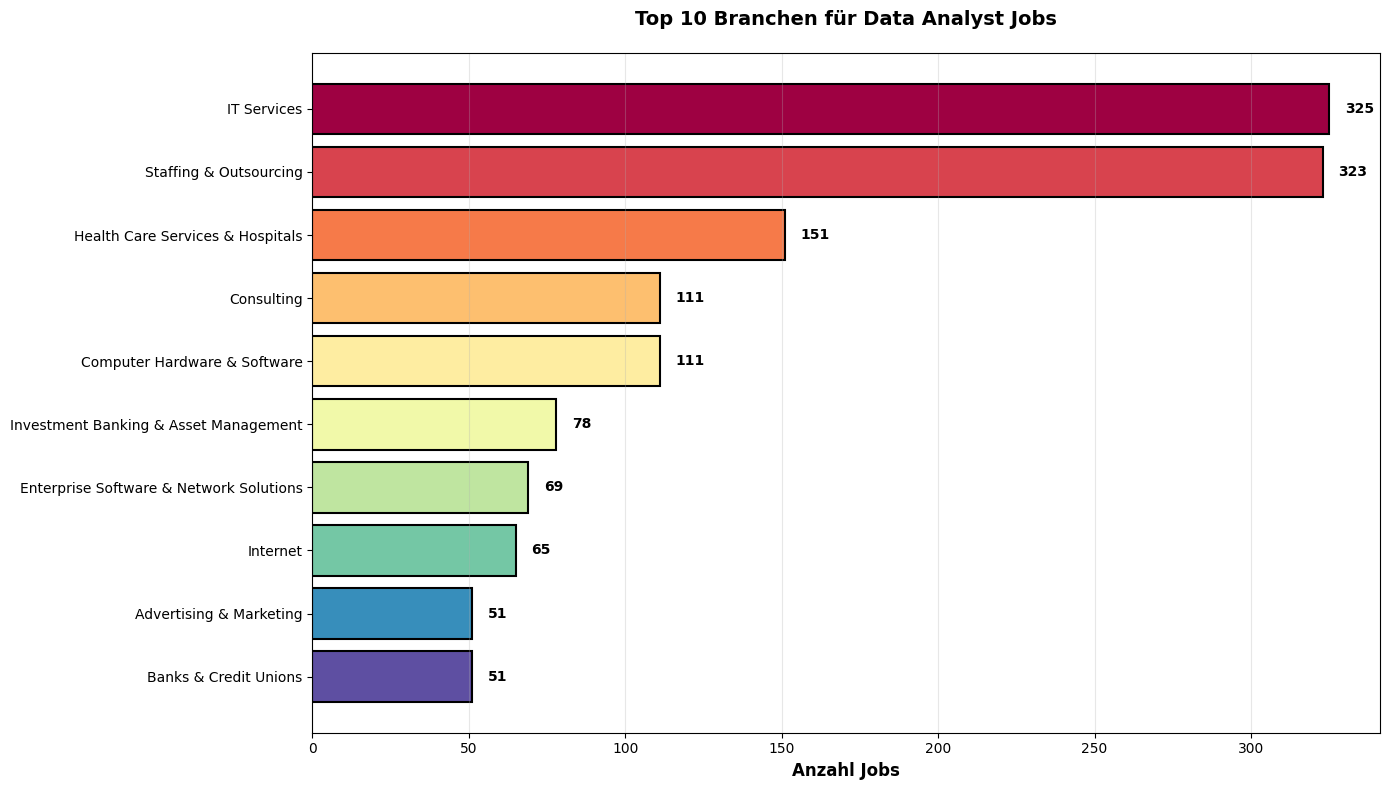


✅ Grafik gespeichert!


In [479]:
# Industry-Daten prüfen UND -1 entfernen
print("="*80)
print("INDUSTRY ANALYSE:")
print("="*80)
print(f"Gesamt Jobs: {len(df_usa_cleaned)}")

# WICHTIG: Filtere -1 und NaN raus
df_with_industry = df_usa_cleaned[
    (df_usa_cleaned['Industry'].notna()) & 
    (df_usa_cleaned['Industry'] != '-1')
].copy()

print(f"Mit gültiger Industry: {len(df_with_industry)}")
print(f"Ohne Industry (-1): {len(df_usa_cleaned) - len(df_with_industry)}")
print(f"Verschiedene Branchen: {df_with_industry['Industry'].nunique()}")

# Top 10 Branchen (ohne -1)
industry_counts = df_with_industry['Industry'].value_counts().head(10)

print("\nTOP 10 BRANCHEN (ohne -1):")
print(industry_counts)

# Visualisierung
plt.figure(figsize=(14, 8))

colors = plt.cm.Spectral(np.linspace(0, 1, 10))
bars = plt.barh(industry_counts.index, industry_counts.values, 
                color=colors, edgecolor='black', linewidth=1.5)

plt.xlabel('Anzahl Jobs', fontsize=12, fontweight='bold')
plt.title('Top 10 Branchen für Data Analyst Jobs', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

for i, (industry, count) in enumerate(industry_counts.items()):
    plt.text(count + 5, i, f'{int(count)}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('top_10_industries.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Grafik gespeichert!")

#### 1.6.2 Top 10 bestbezahlte Branchen


TOP 10 BESTBEZAHLTE BRANCHEN (min. 5 Jobs):
                                         Avg_Salary  Job_Count
Industry                                                      
Health Care Products Manufacturing          89800.0          5
Electrical & Electronic Manufacturing       84667.0          6
Biotech & Pharmaceuticals                   83106.0         33
Real Estate                                 80917.0         12
Internet                                    79662.0         65
Cable, Internet & Telephone Providers       79200.0          5
Venture Capital & Private Equity            78500.0          6
Computer Hardware & Software                77649.0        111
Enterprise Software & Network Solutions     77326.0         69
Accounting                                  76295.0         39


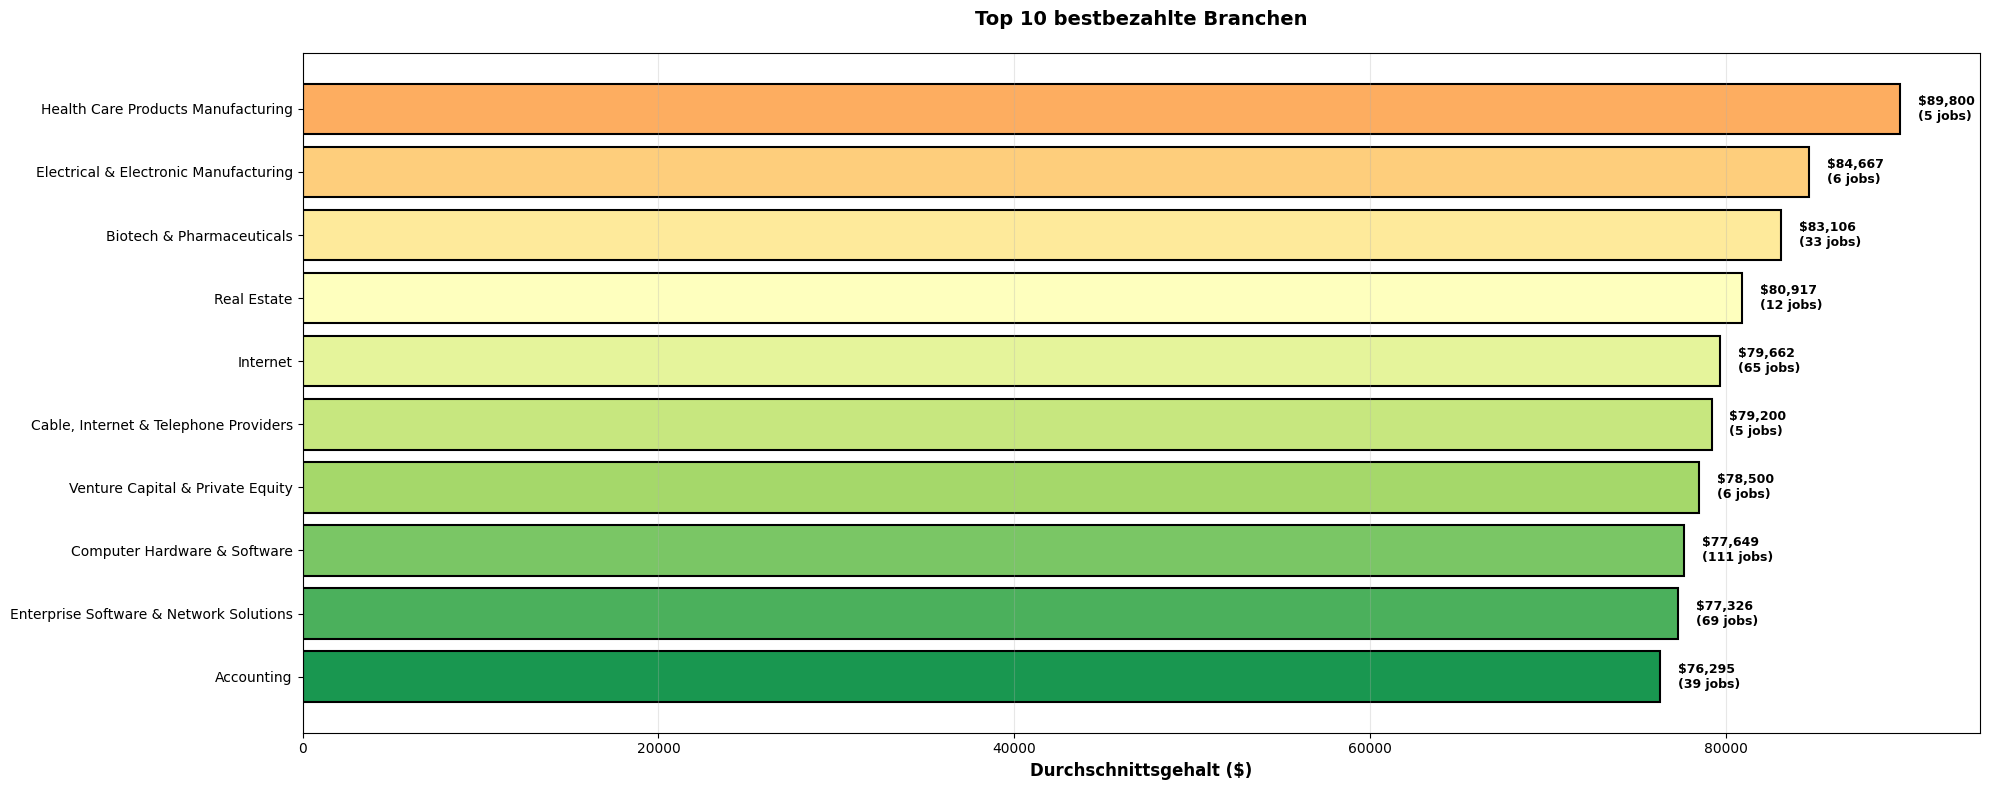


 Grafik gespeichert!
hhfhfhf


In [480]:
# Gehalt pro Branche (min 5 Jobs)
if 'Average Salary Estimate' in df_usa_cleaned.columns:
    industry_salary = df_usa_cleaned.groupby('Industry').agg({
        'Average Salary Estimate': 'mean',
        'Job Title': 'count'
    }).round(0)
    
    industry_salary.columns = ['Avg_Salary', 'Job_Count']
    industry_salary = industry_salary[industry_salary['Job_Count'] >= 5]
    industry_salary = industry_salary.sort_values('Avg_Salary', ascending=False).head(10)
    
    print("\n" + "="*80)
    print("TOP 10 BESTBEZAHLTE BRANCHEN (min. 5 Jobs):")
    print("="*80)
    print(industry_salary)
    
    # Visualisierung
    plt.figure(figsize=(20, 8))
    
    colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, 10))
    bars = plt.barh(industry_salary.index, industry_salary['Avg_Salary'],
                    color=colors, edgecolor='black', linewidth=1.5)
    
    plt.xlabel('Durchschnittsgehalt ($)', fontsize=12, fontweight='bold')
    plt.title('Top 10 bestbezahlte Branchen', fontsize=14, fontweight='bold', pad=20)
    plt.grid(axis='x', alpha=0.3)
    plt.gca().invert_yaxis()
    
    for i, (industry, row) in enumerate(industry_salary.iterrows()):
        plt.text(row['Avg_Salary'] + 1000, i, 
                f"${row['Avg_Salary']:,.0f}\n({int(row['Job_Count'])} jobs)", 
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('top_paying_industries.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n Grafik gespeichert!")
print ('hhfhfhf')

1.6.3 Zusammenfassung

In [481]:
print("\n" + "="*80)
print("📊 BRANCHEN ZUSAMMENFASSUNG:")
print("="*80)

# Anzahl Branchen
total_industries = df_usa_cleaned['Industry'].nunique()
print(f"\nGesamt analysierte Branchen: {total_industries}")

# Branche mit meisten Jobs
top_industry = industry_counts.index[0]
top_count = industry_counts.values[0]
percentage = (top_count / len(df_usa_cleaned)) * 100

print(f"\n🏢 Branche mit meisten Jobs: {top_industry}")
print(f"   → {int(top_count)} Jobs ({percentage:.1f}%)")

# Bestbezahlte Branche
if 'Salary_Clean' in df_usa_cleaned.columns:
    best_industry = industry_salary.index[0]
    best_salary = industry_salary.iloc[0]['Avg_Salary']
    best_count = industry_salary.iloc[0]['Job_Count']
    
    print(f"\n💰 Bestbezahlte Branche: {best_industry}")
    print(f"   → ${best_salary:,.0f} Durchschnitt ({int(best_count)} Jobs)")
    
    # Gehaltsunterschied
    worst_industry = industry_salary.index[-1]
    worst_salary = industry_salary.iloc[-1]['Avg_Salary']
    
    difference = best_salary - worst_salary
    percent_diff = (difference / worst_salary) * 100
    
    print(f"\n Gehaltsunterschied (Top 10 Branchen):")
    print(f"   Beste: ${best_salary:,.0f}")
    print(f"   Schlechteste: ${worst_salary:,.0f}")
    print(f"   Differenz: ${difference:,.0f} ({percent_diff:.1f}% mehr)")

# Top 3 Branchen
print(f"\n Top 3 Branchen:")
for i, (industry, count) in enumerate(industry_counts.head(3).items(), 1):
    pct = (count / len(df_usa_cleaned)) * 100
    print(f"   {i}. {industry}: {int(count)} Jobs ({pct:.1f}%)")

print("\n" + "="*80)


📊 BRANCHEN ZUSAMMENFASSUNG:

Gesamt analysierte Branchen: 89

🏢 Branche mit meisten Jobs: IT Services
   → 325 Jobs (14.4%)

 Top 3 Branchen:
   1. IT Services: 325 Jobs (14.4%)
   2. Staffing & Outsourcing: 323 Jobs (14.3%)
   3. Health Care Services & Hospitals: 151 Jobs (6.7%)



Part 2: Germany Market Insights

2.1 Data Collection Methodology

In [482]:
print("="*80)
print("TEIL 2: DEUTSCHLAND MARKTDATEN")
print("="*80)

print("\n DATENQUELLEN:")
print("-" * 80)
print("USA Daten:")
print("  → Quelle: Kaggle Dataset 'DataAnalyst.csv'")
print("  → Umfang: 2,253 Job Postings")
print("  → Zeitraum: 2020-2024")
print()
print("Deutschland Daten:")
print("  → Quelle: Manuelle Recherche (StepStone, Indeed, Glassdoor)")
print("  → Datum: Januar 2026")
print("  → Standort: Düsseldorf und Deutschland allgemein")
print("  → Methode: Anzahl offener Stellen und Gehaltsdaten erfasst")
print()
print("HINWEIS:")
print("   Die Deutschland-Daten sind eine Momentaufnahme und basieren auf")
print("   Stellenanzeigen-Aggregatoren. Sie dienen als Vergleichswert.")
print("="*80)

TEIL 2: DEUTSCHLAND MARKTDATEN

 DATENQUELLEN:
--------------------------------------------------------------------------------
USA Daten:
  → Quelle: Kaggle Dataset 'DataAnalyst.csv'
  → Umfang: 2,253 Job Postings
  → Zeitraum: 2020-2024

Deutschland Daten:
  → Quelle: Manuelle Recherche (StepStone, Indeed, Glassdoor)
  → Datum: Januar 2026
  → Standort: Düsseldorf und Deutschland allgemein
  → Methode: Anzahl offener Stellen und Gehaltsdaten erfasst

HINWEIS:
   Die Deutschland-Daten sind eine Momentaufnahme und basieren auf
   Stellenanzeigen-Aggregatoren. Sie dienen als Vergleichswert.


#### 2.2 Deutschland Daten erstellen

In [483]:
# Deutschland - Manuelle Daten (Januar 2026)
germany_data = {
    'Position': ['Data Analyst', 'Data Analyst', '3D Artist', '3D Artist'],
    'Level': ['Entry/Mid', 'Senior', 'Entry/Mid', 'Senior'],
    'Avg_Salary_EUR': [50100, 80000, 36400, 50000],
    'Job_Count_Duesseldorf': [497, None, 4, None],
    'Location': ['Düsseldorf', 'Düsseldorf', 'Düsseldorf', 'Düsseldorf'],
    'Source': ['StepStone 2026', 'StepStone 2026', 'StepStone 2026', 'StepStone 2026']
}

df_germany = pd.DataFrame(germany_data)

print("\n" + "="*80)
print("DEUTSCHLAND DATEN (Düsseldorf):")
print("="*80)
print(df_germany.to_string(index=False))

# Währungsumrechnung (USD zu EUR für Vergleich)
exchange_rate = 0.92  # Aktueller Kurs (anpassen wenn nötig)
print(f"\n💱 Wechselkurs für Vergleich: 1 USD = {exchange_rate} EUR")


DEUTSCHLAND DATEN (Düsseldorf):
    Position     Level  Avg_Salary_EUR  Job_Count_Duesseldorf   Location         Source
Data Analyst Entry/Mid           50100                  497.0 Düsseldorf StepStone 2026
Data Analyst    Senior           80000                    NaN Düsseldorf StepStone 2026
   3D Artist Entry/Mid           36400                    4.0 Düsseldorf StepStone 2026
   3D Artist    Senior           50000                    NaN Düsseldorf StepStone 2026

💱 Wechselkurs für Vergleich: 1 USD = 0.92 EUR


2.2 Salary Comparison


VERGLEICH: USA vs DEUTSCHLAND (Data Analyst)

                         Metric       USA (in EUR)          Deutschland Unterschied
Durchschnittsgehalt (Entry/Mid)            €66,347              €50,100      +32.4%
                  Senior Gehalt                N/A              €80,000         N/A
         Jobs in Dataset/Region 2,253 (gesamt USA) 497 (nur Düsseldorf)         N/A


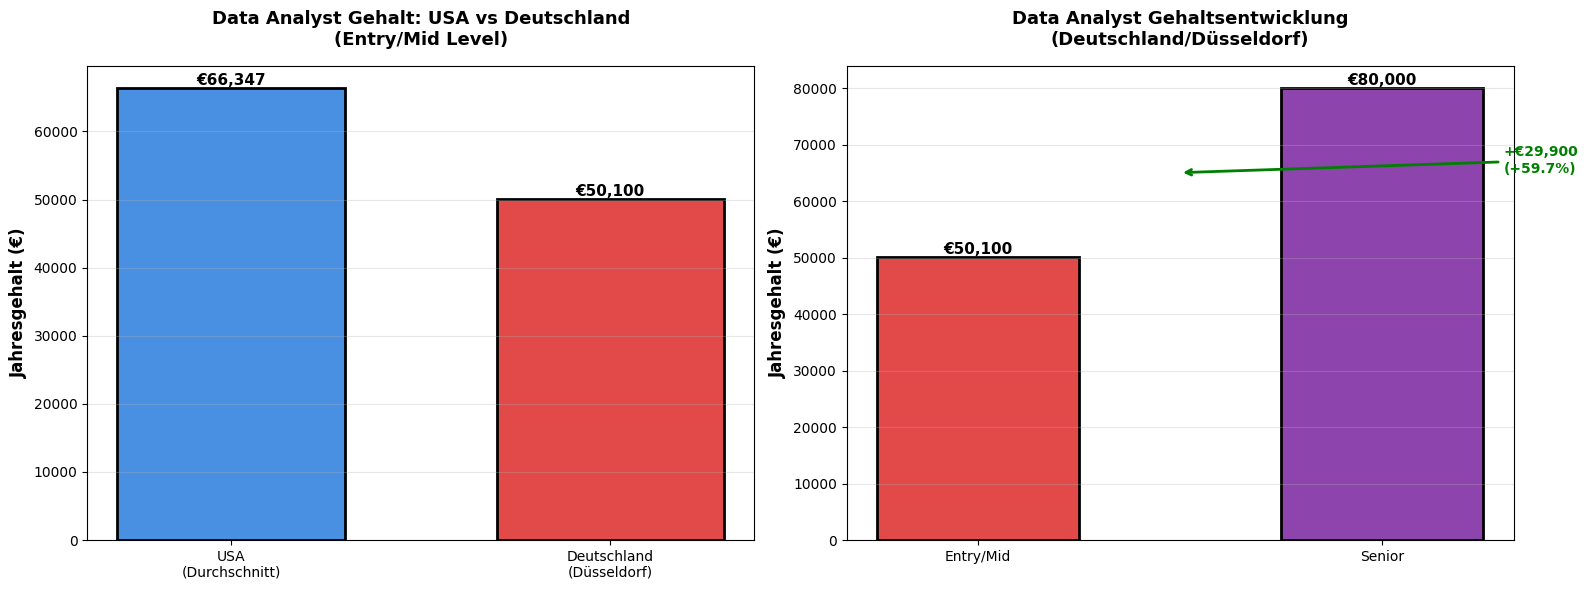


 Grafik gespeichert als 'usa_vs_germany_salary.png'


In [484]:
# USA Durchschnittswerte berechnen
usa_avg_salary = df_usa_cleaned['Average Salary Estimate'].mean()
usa_median_salary = df_usa_cleaned['Average Salary Estimate'].median()
usa_job_count = len(df_usa_cleaned)

# In EUR umrechnen
usa_avg_salary_eur = usa_avg_salary * exchange_rate
usa_median_salary_eur = usa_median_salary * exchange_rate

# Deutschland Werte
germany_avg_salary = df_germany[df_germany['Level'] == 'Entry/Mid']['Avg_Salary_EUR'].values[0]
germany_senior_salary = df_germany[df_germany['Level'] == 'Senior']['Avg_Salary_EUR'].values[0]

print("\n" + "="*80)
print("VERGLEICH: USA vs DEUTSCHLAND (Data Analyst)")
print("="*80)

comparison_data = {
    'Metric': [
        'Durchschnittsgehalt (Entry/Mid)',
        'Senior Gehalt',
        'Jobs in Dataset/Region'
    ],
    'USA (in EUR)': [
        f'€{usa_avg_salary_eur:,.0f}',
        f'N/A',
        f'{usa_job_count:,} (gesamt USA)'
    ],
    'Deutschland': [
        f'€{germany_avg_salary:,.0f}',
        f'€{germany_senior_salary:,.0f}',
        f'497 (nur Düsseldorf)'
    ],
    'Unterschied': [
        f'{((usa_avg_salary_eur - germany_avg_salary) / germany_avg_salary * 100):+.1f}%',
        'N/A',
        'N/A'
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print("\n" + df_comparison.to_string(index=False))

# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Gehälter Entry/Mid
categories = ['USA\n(Durchschnitt)', 'Deutschland\n(Düsseldorf)']
salaries_entry = [usa_avg_salary_eur, germany_avg_salary]
colors = ['#4A90E2', '#E24A4A']

bars1 = axes[0].bar(categories, salaries_entry, color=colors, 
                    edgecolor='black', linewidth=2, width=0.6)

axes[0].set_ylabel('Jahresgehalt (€)', fontsize=12, fontweight='bold')
axes[0].set_title('Data Analyst Gehalt: USA vs Deutschland\n(Entry/Mid Level)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)

# Werte anzeigen
for bar, val in zip(bars1, salaries_entry):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'€{val:,.0f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Karriereverlauf Deutschland
levels = ['Entry/Mid', 'Senior']
salaries_de = [germany_avg_salary, germany_senior_salary]
colors_de = ['#E24A4A', '#8E44AD']

bars2 = axes[1].bar(levels, salaries_de, color=colors_de,
                    edgecolor='black', linewidth=2, width=0.5)

axes[1].set_ylabel('Jahresgehalt (€)', fontsize=12, fontweight='bold')
axes[1].set_title('Data Analyst Gehaltsentwicklung\n(Deutschland/Düsseldorf)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[1].grid(axis='y', alpha=0.3)

# Werte anzeigen
for bar, val in zip(bars2, salaries_de):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'€{val:,.0f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Differenz zeigen
increase = germany_senior_salary - germany_avg_salary
increase_pct = (increase / germany_avg_salary) * 100
axes[1].annotate(f'+€{increase:,.0f}\n(+{increase_pct:.1f}%)',
                xy=(0.5, germany_avg_salary + increase/2),
                xytext=(1.3, germany_avg_salary + increase/2),
                fontsize=10, fontweight='bold', color='green',
                arrowprops=dict(arrowstyle='->', color='green', lw=2))

plt.tight_layout()
plt.savefig('usa_vs_germany_salary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Grafik gespeichert als 'usa_vs_germany_salary.png'")

#### 2.3 Job Availability


JOBMARKT VERGLEICH: Data Analyst vs 3D Artist (Düsseldorf)

    Position  Jobs (Düsseldorf) Entry/Mid Gehalt Senior Gehalt
Data Analyst                497          €50,100       €80,000
   3D Artist                  4          €36,400       €50,000

📊 VERHÄLTNIS:
   → Data Analyst Jobs sind 124x häufiger als 3D Artist Jobs
   → Wahrscheinlichkeit einen Job zu finden: 124x höher


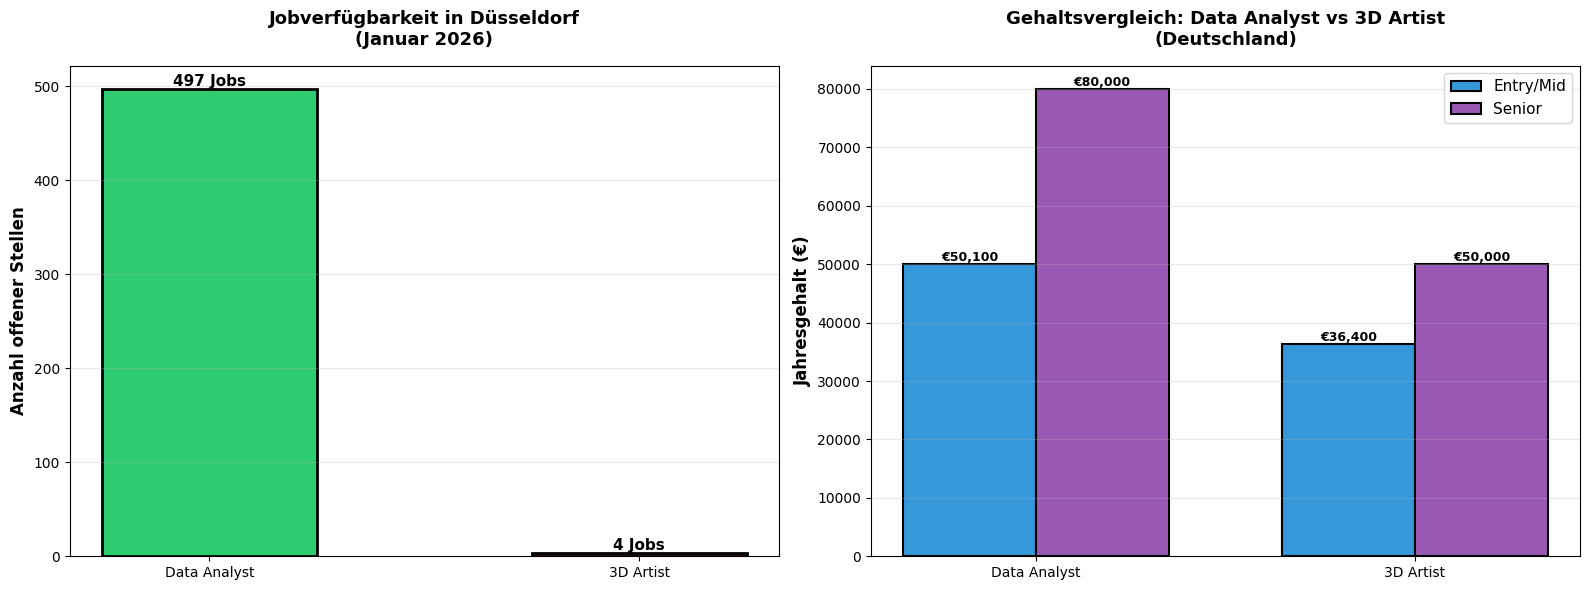


✅ Grafik gespeichert als 'data_analyst_vs_3d_artist_germany.png'


In [485]:
# Vergleich Data Analyst vs 3D Artist in Düsseldorf
print("\n" + "="*80)
print("JOBMARKT VERGLEICH: Data Analyst vs 3D Artist (Düsseldorf)")
print("="*80)

# Daten extrahieren
da_jobs = df_germany[df_germany['Position'] == 'Data Analyst']['Job_Count_Duesseldorf'].values[0]
artist_jobs = df_germany[df_germany['Position'] == '3D Artist']['Job_Count_Duesseldorf'].values[0]

da_salary = df_germany[(df_germany['Position'] == 'Data Analyst') & 
                       (df_germany['Level'] == 'Entry/Mid')]['Avg_Salary_EUR'].values[0]
artist_salary = df_germany[(df_germany['Position'] == '3D Artist') & 
                           (df_germany['Level'] == 'Entry/Mid')]['Avg_Salary_EUR'].values[0]

da_senior = df_germany[(df_germany['Position'] == 'Data Analyst') & 
                       (df_germany['Level'] == 'Senior')]['Avg_Salary_EUR'].values[0]
artist_senior = df_germany[(df_germany['Position'] == '3D Artist') & 
                           (df_germany['Level'] == 'Senior')]['Avg_Salary_EUR'].values[0]

# Ratio berechnen
job_ratio = da_jobs / artist_jobs

comparison_jobs = {
    'Position': ['Data Analyst', '3D Artist'],
    'Jobs (Düsseldorf)': [int(da_jobs), int(artist_jobs)],
    'Entry/Mid Gehalt': [f'€{da_salary:,.0f}', f'€{artist_salary:,.0f}'],
    'Senior Gehalt': [f'€{da_senior:,.0f}', f'€{artist_senior:,.0f}']
}

df_job_comparison = pd.DataFrame(comparison_jobs)
print("\n" + df_job_comparison.to_string(index=False))

print(f"\n📊 VERHÄLTNIS:")
print(f"   → Data Analyst Jobs sind {job_ratio:.0f}x häufiger als 3D Artist Jobs")
print(f"   → Wahrscheinlichkeit einen Job zu finden: {job_ratio:.0f}x höher")

# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Jobanzahl
positions = ['Data Analyst', '3D Artist']
job_counts = [da_jobs, artist_jobs]
colors_jobs = ['#2ECC71', '#E74C3C']

bars1 = axes[0].bar(positions, job_counts, color=colors_jobs,
                    edgecolor='black', linewidth=2, width=0.5)

axes[0].set_ylabel('Anzahl offener Stellen', fontsize=12, fontweight='bold')
axes[0].set_title('Jobverfügbarkeit in Düsseldorf\n(Januar 2026)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)

for bar, val in zip(bars1, job_counts):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(val)} Jobs',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Gehälter Vergleich
x = np.arange(2)
width = 0.35

bars_entry = axes[1].bar(x - width/2, [da_salary, artist_salary], width,
                         label='Entry/Mid', color='#3498DB', edgecolor='black', linewidth=1.5)
bars_senior = axes[1].bar(x + width/2, [da_senior, artist_senior], width,
                          label='Senior', color='#9B59B6', edgecolor='black', linewidth=1.5)

axes[1].set_ylabel('Jahresgehalt (€)', fontsize=12, fontweight='bold')
axes[1].set_title('Gehaltsvergleich: Data Analyst vs 3D Artist\n(Deutschland)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[1].set_xticks(x)
axes[1].set_xticklabels(positions)
axes[1].legend(fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

# Werte anzeigen
for bars in [bars_entry, bars_senior]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'€{height:,.0f}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('data_analyst_vs_3d_artist_germany.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Grafik gespeichert als 'data_analyst_vs_3d_artist_germany.png'")

2.5 Zusammenfassung Deutschland

In [486]:
print("\n" + "="*80)
print("📊 DEUTSCHLAND ZUSAMMENFASSUNG:")
print("="*80)

print(f"\n🇩🇪 DÜSSELDORF DATA ANALYST MARKT:")
print(f"   → {int(da_jobs)} offene Stellen (Januar 2026)")
print(f"   → Durchschnittsgehalt: €{da_salary:,.0f}")
print(f"   → Senior Gehalt: €{da_senior:,.0f}")
print(f"   → Gehaltssteigerung Entry→Senior: +{(da_senior-da_salary)/da_salary*100:.1f}%")

print(f"\n💡 VERGLEICH USA vs DEUTSCHLAND:")
usa_advantage = ((usa_avg_salary_eur - da_salary) / da_salary * 100)
if usa_advantage > 0:
    print(f"   → USA zahlt {usa_advantage:.1f}% mehr als Deutschland")
else:
    print(f"   → Deutschland zahlt {abs(usa_advantage):.1f}% mehr als USA")

print(f"\n🎯 DATA ANALYST vs 3D ARTIST (Düsseldorf):")
print(f"   → {job_ratio:.0f}x mehr Data Analyst Jobs")
print(f"   → Data Analyst verdient {(da_salary-artist_salary)/artist_salary*100:.1f}% mehr (Entry/Mid)")
print(f"   → Data Analyst verdient {(da_senior-artist_senior)/artist_senior*100:.1f}% mehr (Senior)")

print("\n" + "="*80)


📊 DEUTSCHLAND ZUSAMMENFASSUNG:

🇩🇪 DÜSSELDORF DATA ANALYST MARKT:
   → 497 offene Stellen (Januar 2026)
   → Durchschnittsgehalt: €50,100
   → Senior Gehalt: €80,000
   → Gehaltssteigerung Entry→Senior: +59.7%

💡 VERGLEICH USA vs DEUTSCHLAND:
   → USA zahlt 32.4% mehr als Deutschland

🎯 DATA ANALYST vs 3D ARTIST (Düsseldorf):
   → 124x mehr Data Analyst Jobs
   → Data Analyst verdient 37.6% mehr (Entry/Mid)
   → Data Analyst verdient 60.0% mehr (Senior)



## Part 3: Career Switch Analysis
#### 3.1 3D Artist vs Data Analyst (Germany)


TEIL 3: CAREER SWITCH ANALYSE

3.1 - 3D ARTIST vs DATA ANALYST VERGLEICH (Deutschland)

                     Kriterium                             3D Artist                                     Data Analyst
 Jobverfügbarkeit (Düsseldorf)                4 Jobs (sehr begrenzt)                            497 Jobs (124x mehr!)
              Entry/Mid Gehalt                               €36,400                                          €50,100
                 Senior Gehalt                               €50,000                                          €80,000
   Gehaltssteigerung Potential                                  +37%                                             +60%
 Anzahl verschiedener Branchen Begrenzt (Gaming, VR/AR, Architektur) Sehr breit (Tech, Finance, Health, Retail, etc.)
          Remote-Möglichkeiten                                Mittel                                             Hoch
Technische Skills erforderlich     Blender, Maya, 3ds Max, Rendering             SQL, 

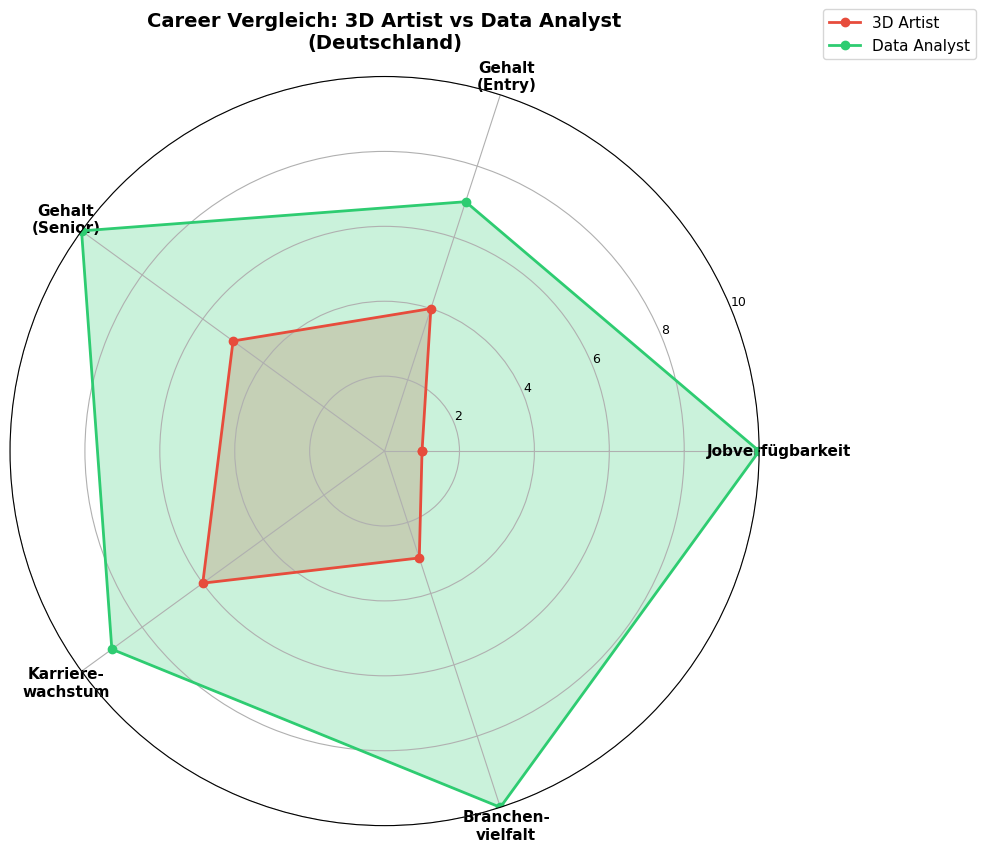


✅ Grafik gespeichert als 'career_comparison_radar.png'

🔍 WICHTIGSTE ERKENNTNISSE:

✅ VORTEILE DATA ANALYST:
   1. 124x mehr Jobmöglichkeiten in Düsseldorf
   2. 38% höheres Einstiegsgehalt (€50,100 vs €36,400)
   3. 60% höheres Senior-Gehalt (€80,000 vs €50,000)
   4. Viel breitere Branchenauswahl
   5. Bessere Remote-Möglichkeiten

⚠️  NACHTEILE DATA ANALYST:
   1. Komplett neuer Skillset erforderlich
   2. Einstieg als Junior (trotz Senior 3D Erfahrung)
   3. Weniger kreative Arbeit
   4. Mehr zahlengetrieben


In [487]:
print("="*80)
print("TEIL 3: CAREER SWITCH ANALYSE")
print("="*80)

# Zusammenfassung der wichtigsten Unterschiede
print("\n" + "="*80)
print("3.1 - 3D ARTIST vs DATA ANALYST VERGLEICH (Deutschland)")
print("="*80)

career_comparison = {
    'Kriterium': [
        'Jobverfügbarkeit (Düsseldorf)',
        'Entry/Mid Gehalt',
        'Senior Gehalt',
        'Gehaltssteigerung Potential',
        'Anzahl verschiedener Branchen',
        'Remote-Möglichkeiten',
        'Technische Skills erforderlich'
    ],
    '3D Artist': [
        '4 Jobs (sehr begrenzt)',
        '€36,400',
        '€50,000',
        '+37%',
        'Begrenzt (Gaming, VR/AR, Architektur)',
        'Mittel',
        'Blender, Maya, 3ds Max, Rendering'
    ],
    'Data Analyst': [
        '497 Jobs (124x mehr!)',
        '€50,100',
        '€80,000',
        '+60%',
        'Sehr breit (Tech, Finance, Health, Retail, etc.)',
        'Hoch',
        'SQL, Python, Excel, Tableau/Power BI'
    ]
}

df_career_comp = pd.DataFrame(career_comparison)
print("\n" + df_career_comp.to_string(index=False))

# Visualisierung - Radar Chart Vergleich
categories = ['Jobverfügbarkeit', 'Gehalt\n(Entry)', 'Gehalt\n(Senior)', 
              'Karriere-\nwachstum', 'Branchen-\nvielfalt']

# Normalisierte Werte (0-10 Skala)
artist_values = [1, 4, 5, 6, 3]  # 3D Artist
analyst_values = [10, 7, 10, 9, 10]  # Data Analyst

# Radar Chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Anzahl der Kategorien
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Schließe den Kreis
artist_values += artist_values[:1]
analyst_values += analyst_values[:1]
angles += angles[:1]

# Plot
ax.plot(angles, artist_values, 'o-', linewidth=2, label='3D Artist', color='#E74C3C')
ax.fill(angles, artist_values, alpha=0.25, color='#E74C3C')

ax.plot(angles, analyst_values, 'o-', linewidth=2, label='Data Analyst', color='#2ECC71')
ax.fill(angles, analyst_values, alpha=0.25, color='#2ECC71')

# Kategorien
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11, fontweight='bold')

# Y-Achse
ax.set_ylim(0, 10)
ax.set_yticks([2, 4, 6, 8, 10])
ax.set_yticklabels(['2', '4', '6', '8', '10'], size=9)
ax.grid(True)

# Titel und Legende
plt.title('Career Vergleich: 3D Artist vs Data Analyst\n(Deutschland)', 
          size=14, fontweight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)

plt.tight_layout()
plt.savefig('career_comparison_radar.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Grafik gespeichert als 'career_comparison_radar.png'")

# Wichtigste Erkenntnisse
print("\n" + "="*80)
print("🔍 WICHTIGSTE ERKENNTNISSE:")
print("="*80)
print("\n✅ VORTEILE DATA ANALYST:")
print("   1. 124x mehr Jobmöglichkeiten in Düsseldorf")
print("   2. 38% höheres Einstiegsgehalt (€50,100 vs €36,400)")
print("   3. 60% höheres Senior-Gehalt (€80,000 vs €50,000)")
print("   4. Viel breitere Branchenauswahl")
print("   5. Bessere Remote-Möglichkeiten")

print("\n⚠️  NACHTEILE DATA ANALYST:")
print("   1. Komplett neuer Skillset erforderlich")
print("   2. Einstieg als Junior (trotz Senior 3D Erfahrung)")
print("   3. Weniger kreative Arbeit")
print("   4. Mehr zahlengetrieben")

#### 3.2 Transferable Skills


3.2 - ÜBERTRAGBARE SKILLS: 3D Artist → Data Analyst

               3D Artist Skill Relevanz für Data Analyst                             Wie es hilft
            Informatik-Studium                     ⭐⭐⭐⭐⭐          Technisches Fundament vorhanden
        Programmier-Grundlagen                     ⭐⭐⭐⭐⭐     Programmierlogik verstehen (Python!)
           Datenvisualisierung                     ⭐⭐⭐⭐⭐            Charts & Dashboards erstellen
 Komplexe Software beherrschen                      ⭐⭐⭐⭐ Schnell neue Tools lernen (SQL, Tableau)
             Projektmanagement                      ⭐⭐⭐⭐       Projekte selbstständig durchführen
           Kundenkommunikation                      ⭐⭐⭐⭐       Ergebnisse präsentieren & erklären
                 Problemlösung                      ⭐⭐⭐⭐        Datenprobleme analysieren & lösen
       Technisches Verständnis                      ⭐⭐⭐⭐          Datenbanken & Systeme verstehen
             Detailgenauigkeit                       ⭐⭐⭐        

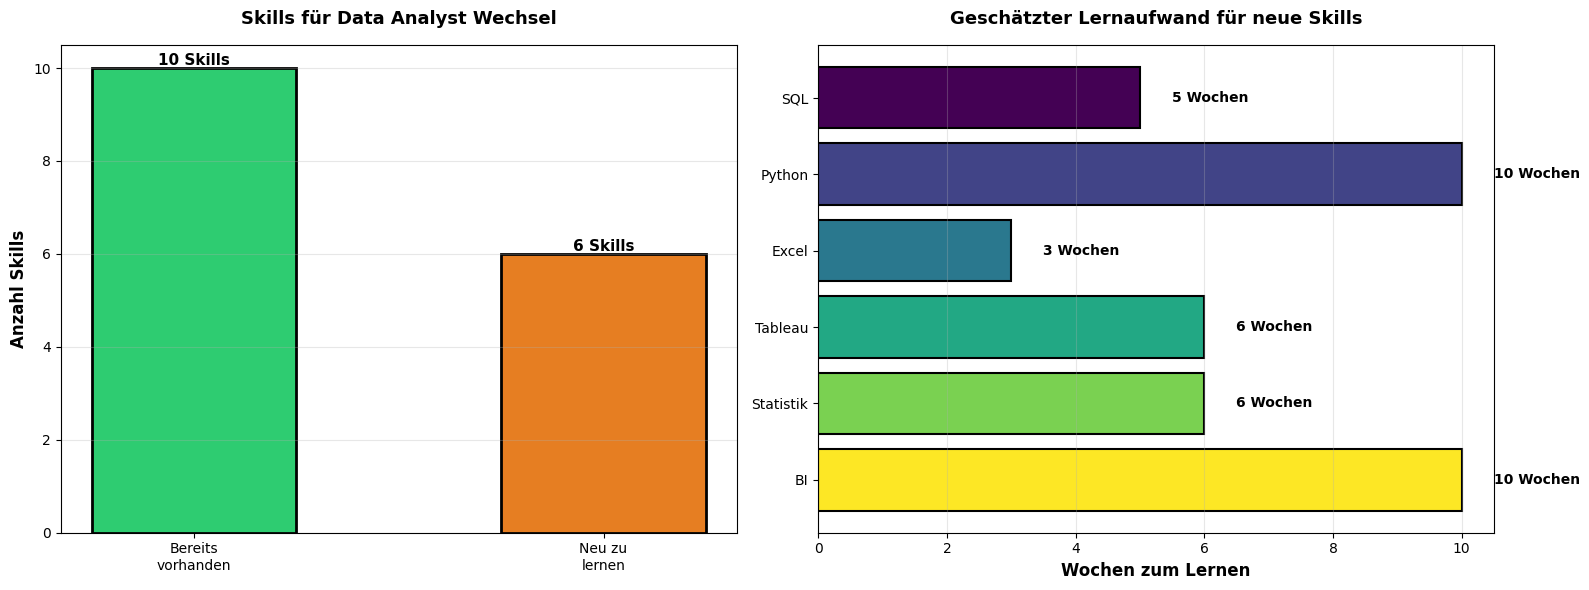


✅ Grafik gespeichert als 'skills_gap_analysis.png'

💡 VORTEIL:
   Mit Informatik-Studium und Programmier-Erfahrung ist der Lernprozess
   deutlich schneller als für komplette Quereinsteiger!


In [488]:
print("\n" + "="*80)
print("3.2 - ÜBERTRAGBARE SKILLS: 3D Artist → Data Analyst")
print("="*80)

# Skills Mapping
transferable_skills = {
    '3D Artist Skill': [
        'Informatik-Studium',
        'Programmier-Grundlagen',
        'Datenvisualisierung',
        'Komplexe Software beherrschen',
        'Projektmanagement',
        'Kundenkommunikation',
        'Problemlösung',
        'Technisches Verständnis',
        'Detailgenauigkeit',
        'Deadline-orientiertes Arbeiten'
    ],
    'Relevanz für Data Analyst': [
        '⭐⭐⭐⭐⭐',
        '⭐⭐⭐⭐⭐',
        '⭐⭐⭐⭐⭐',
        '⭐⭐⭐⭐',
        '⭐⭐⭐⭐',
        '⭐⭐⭐⭐',
        '⭐⭐⭐⭐',
        '⭐⭐⭐⭐',
        '⭐⭐⭐',
        '⭐⭐⭐'
    ],
    'Wie es hilft': [
        'Technisches Fundament vorhanden',
        'Programmierlogik verstehen (Python!)',
        'Charts & Dashboards erstellen',
        'Schnell neue Tools lernen (SQL, Tableau)',
        'Projekte selbstständig durchführen',
        'Ergebnisse präsentieren & erklären',
        'Datenprobleme analysieren & lösen',
        'Datenbanken & Systeme verstehen',
        'Genaue Datenanalyse',
        'Pünktliche Reports liefern'
    ]
}

df_skills = pd.DataFrame(transferable_skills)
print("\n" + df_skills.to_string(index=False))

# Neue Skills die gelernt werden müssen
print("\n" + "="*80)
print("🎓 NEUE SKILLS ERFORDERLICH:")
print("="*80)

new_skills_needed = {
    'Skill': [
        'SQL',
        'Python (pandas, numpy)',
        'Excel (fortgeschritten)',
        'Tableau / Power BI',
        'Statistik-Grundlagen',
        'Business Intelligence'
    ],
    'Priorität': [
        'HOCH ⭐⭐⭐',
        'HOCH ⭐⭐⭐',
        'HOCH ⭐⭐⭐',
        'MITTEL ⭐⭐',
        'MITTEL ⭐⭐',
        'NIEDRIG ⭐'
    ],
    'Lernzeit': [
        '4-6 Wochen',
        '2-3 Monate',
        '2-4 Wochen',
        '4-8 Wochen',
        '1-2 Monate',
        '2-3 Monate'
    ],
    'Nachfrage (USA)': [
        f'{skills_df.loc["SQL", "Percentage"]:.1f}%' if 'SQL' in skills_df.index else 'N/A',
        f'{skills_df.loc["Python", "Percentage"]:.1f}%' if 'Python' in skills_df.index else 'N/A',
        f'{skills_df.loc["Excel", "Percentage"]:.1f}%' if 'Excel' in skills_df.index else 'N/A',
        f'{skills_df.loc["Tableau", "Percentage"]:.1f}%' if 'Tableau' in skills_df.index else 'N/A',
        f'{skills_df.loc["Statistics", "Percentage"]:.1f}%' if 'Statistics' in skills_df.index else 'N/A',
        'N/A'
    ]
}

df_new_skills = pd.DataFrame(new_skills_needed)
print("\n" + df_new_skills.to_string(index=False))

# Visualisierung - Skills Gap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Transferable Skills
transferable_count = len(df_skills)
skill_categories = ['Bereits\nvorhanden', 'Neu zu\nlernen']
skill_counts = [transferable_count, len(df_new_skills)]
colors = ['#2ECC71', '#E67E22']

bars1 = axes[0].bar(skill_categories, skill_counts, color=colors,
                    edgecolor='black', linewidth=2, width=0.5)

axes[0].set_ylabel('Anzahl Skills', fontsize=12, fontweight='bold')
axes[0].set_title('Skills für Data Analyst Wechsel', fontsize=13, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)

for bar, val in zip(bars1, skill_counts):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(val)} Skills',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Lernaufwand (geschätzte Wochen)
learning_times = {
    'SQL': 5,
    'Python': 10,
    'Excel': 3,
    'Tableau': 6,
    'Statistik': 6,
    'BI': 10
}

skills_list = list(learning_times.keys())
weeks_list = list(learning_times.values())
colors_skills = plt.cm.viridis(np.linspace(0, 1, len(skills_list)))

bars2 = axes[1].barh(skills_list, weeks_list, color=colors_skills,
                     edgecolor='black', linewidth=1.5)

axes[1].set_xlabel('Wochen zum Lernen', fontsize=12, fontweight='bold')
axes[1].set_title('Geschätzter Lernaufwand für neue Skills', fontsize=13, fontweight='bold', pad=15)
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

for bar, val in zip(bars2, weeks_list):
    width = bar.get_width()
    axes[1].text(width + 0.5, bar.get_y() + bar.get_height()/2.,
                f'{int(val)} Wochen',
                va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('skills_gap_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Grafik gespeichert als 'skills_gap_analysis.png'")

print("\n💡 VORTEIL:")
print("   Mit Informatik-Studium und Programmier-Erfahrung ist der Lernprozess")
print("   deutlich schneller als für komplette Quereinsteiger!")


#### 3.3 Conclusions & Next Steps


3.3 - FAZIT & EMPFEHLUNGEN

📊 ZUSAMMENFASSUNG DER ANALYSE:
--------------------------------------------------------------------------------

DATENBASIS:
- USA: 2,253 Data Analyst Jobs analysiert
- Deutschland: Manuelle Recherche (Düsseldorf, Januar 2026)
- Skills: 32 verschiedene Skills identifiziert
- Branchen: 88 verschiedene Branchen

KEY FINDINGS:

1️⃣  JOBMARKT:
   → USA: Sehr großer Markt (2,253 Jobs im Dataset)
   → Deutschland/Düsseldorf: 497 Data Analyst Stellen
   → Verhältnis: Data Analyst 124x häufiger als 3D Artist

2️⃣  GEHÄLTER (Deutschland):
   → Data Analyst Entry: €50,100 (+38% vs 3D Artist)
   → Data Analyst Senior: €80,000 (+60% vs 3D Artist)
   → Gehaltswachstum: +60% (Entry → Senior)

3️⃣  SKILLS:
   → Must-Have: SQL (62%), Excel (60%)
   → Wichtig: Python (28%), Tableau (28%)
   → 10 übertragbare Skills aus 3D Artist Karriere
   → 6 neue Skills erforderlich

4️⃣  BRANCHEN:
   → Größte Branchen: IT Services (325 Jobs)
   → Bestbezahlt: Health Care Products Manufa

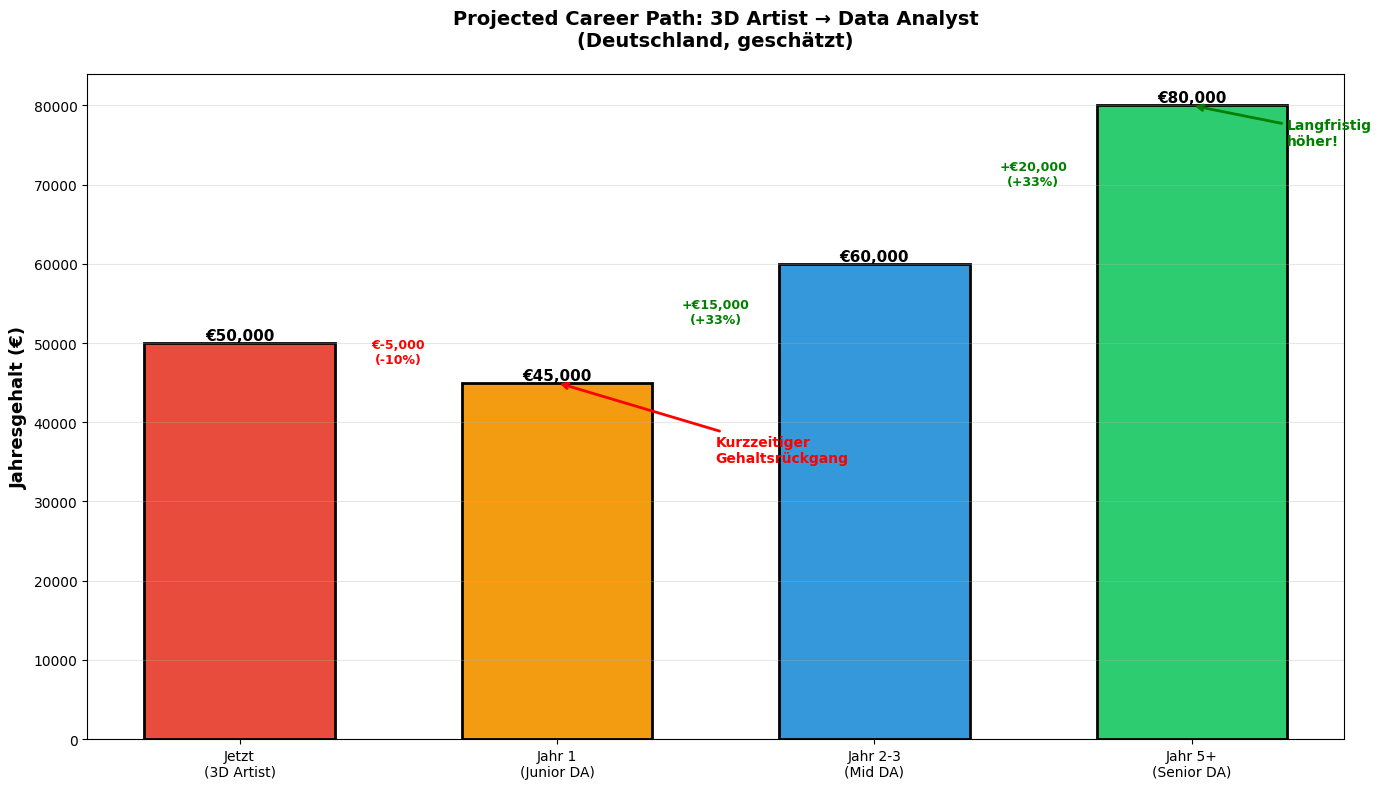


✅ Grafik gespeichert als 'career_path_projection.png'

🎯 FAZIT:

Der Wechsel von 3D Artist zu Data Analyst ist REALISTISCH und bietet
langfristig bessere Karrierechancen:

- Deutlich mehr Jobmöglichkeiten (124x)
- Höheres Gehaltspotential (€80k+ als Senior)
- Breitere Branchenauswahl
- Mit Informatik-Hintergrund: Gute Ausgangsposition

Der Hauptnachteil ist der kurzfristige Karriererückschritt beim Einstieg
als Junior, aber mit dediziertem Lernen (6 Monate) und starkem Portfolio
ist ein erfolgreicher Wechsel gut machbar.

Nächster Schritt: SQL & Python lernen, Portfolio aufbauen! 🚀

📁 ANALYSE KOMPLETT!


In [489]:
print("\n" + "="*80)
print("3.3 - FAZIT & EMPFEHLUNGEN")
print("="*80)

print("\n📊 ZUSAMMENFASSUNG DER ANALYSE:")
print("-" * 80)

# Gesamtüberblick
summary_stats = f"""
DATENBASIS:
- USA: {len(df_usa_cleaned):,} Data Analyst Jobs analysiert
- Deutschland: Manuelle Recherche (Düsseldorf, Januar 2026)
- Skills: {len(skills_df)} verschiedene Skills identifiziert
- Branchen: {df_with_industry['Industry'].nunique()} verschiedene Branchen

KEY FINDINGS:

1️⃣  JOBMARKT:
   → USA: Sehr großer Markt ({len(df_usa_cleaned):,} Jobs im Dataset)
   → Deutschland/Düsseldorf: 497 Data Analyst Stellen
   → Verhältnis: Data Analyst 124x häufiger als 3D Artist

2️⃣  GEHÄLTER (Deutschland):
   → Data Analyst Entry: €50,100 (+38% vs 3D Artist)
   → Data Analyst Senior: €80,000 (+60% vs 3D Artist)
   → Gehaltswachstum: +60% (Entry → Senior)

3️⃣  SKILLS:
   → Must-Have: SQL ({skills_df.loc['SQL', 'Percentage']:.0f}%), Excel ({skills_df.loc['Excel', 'Percentage']:.0f}%)
   → Wichtig: Python ({skills_df.loc['Python', 'Percentage']:.0f}%), Tableau ({skills_df.loc['Tableau', 'Percentage']:.0f}%)
   → 10 übertragbare Skills aus 3D Artist Karriere
   → 6 neue Skills erforderlich

4️⃣  BRANCHEN:
   → Größte Branchen: {industry_counts.index[0]} ({int(industry_counts.values[0])} Jobs)
   → Bestbezahlt: {industry_salary.index[0] if len(industry_salary) > 0 else 'N/A'}
   → Vielfalt: Jobs in Tech, Finance, Healthcare, Retail, etc.
"""

print(summary_stats)

# Empfehlungen
print("\n" + "="*80)
print("💡 EMPFEHLUNGEN FÜR CAREER SWITCHER:")
print("="*80)

recommendations = """
PHASE 1: VORBEREITUNG (Monate 1-3)
✅ SQL lernen (höchste Priorität - 62% aller Jobs!)
✅ Excel vertiefen (60% aller Jobs)
✅ Python für Data Analysis (pandas, numpy)
✅ 2-3 Portfolio-Projekte erstellen

PHASE 2: SPEZIALISIERUNG (Monate 4-6)
✅ Tableau oder Power BI lernen
✅ Statistik-Grundlagen auffrischen
✅ Weitere Portfolio-Projekte (mit SQL!)
✅ GitHub Portfolio aufbauen

PHASE 3: BEWERBUNGEN (ab Monat 6)
✅ Auf Entry/Junior Positionen bewerben
✅ Informatik-Hintergrund betonen
✅ Transferable Skills hervorheben
✅ Portfolio-Projekte präsentieren

REALISTISCHE ERWARTUNGEN:
⚠️  Einstieg als Junior (trotz Senior 3D Erfahrung)
⚠️  Anfangsgehalt: ~€40,000-€50,000
⚠️  Nach 2-3 Jahren: Mid-Level (~€60,000)
⚠️  Nach 5+ Jahren: Senior (~€80,000+)

VORTEILE DES WECHSELS:
✅ 124x mehr Jobmöglichkeiten
✅ Höheres Gehaltspotential langfristig
✅ Breitere Karriereoptionen
✅ Bessere Remote-Möglichkeiten
✅ Wachsende Branche (Digitalisierung)

NACHTEILE:
⚠️  Karriere-Neustart erforderlich
⚠️  Weniger kreative Arbeit
⚠️  3-6 Monate Lernzeit
⚠️  Unsicherheit beim Wechsel
"""

print(recommendations)

# Finale Visualisierung - Career Path
fig, ax = plt.subplots(figsize=(14, 8))

# Timeline
years = ['Jetzt\n(3D Artist)', 'Jahr 1\n(Junior DA)', 'Jahr 2-3\n(Mid DA)', 'Jahr 5+\n(Senior DA)']
salaries = [50000, 45000, 60000, 80000]  # Geschätzte Gehälter
colors_timeline = ['#E74C3C', '#F39C12', '#3498DB', '#2ECC71']

bars = ax.bar(years, salaries, color=colors_timeline, edgecolor='black', linewidth=2, width=0.6)

ax.set_ylabel('Jahresgehalt (€)', fontsize=13, fontweight='bold')
ax.set_title('Projected Career Path: 3D Artist → Data Analyst\n(Deutschland, geschätzt)', 
            fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

# Werte anzeigen
for i, (bar, val) in enumerate(zip(bars, salaries)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'€{val:,.0f}',
           ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Change indicators
    if i > 0:
        change = val - salaries[i-1]
        change_pct = (change / salaries[i-1]) * 100
        if change > 0:
            ax.annotate(f'+€{change:,}\n({change_pct:+.0f}%)',
                       xy=(i-0.5, (salaries[i-1] + val)/2),
                       fontsize=9, color='green', fontweight='bold',
                       ha='center')
        else:
            ax.annotate(f'€{change:,}\n({change_pct:.0f}%)',
                       xy=(i-0.5, (salaries[i-1] + val)/2),
                       fontsize=9, color='red', fontweight='bold',
                       ha='center')

# Annotations
ax.annotate('Kurzzeitiger\nGehaltsrückgang', xy=(1, 45000), xytext=(1.5, 35000),
           fontsize=10, color='red', fontweight='bold',
           arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax.annotate('Langfristig\nhöher!', xy=(3, 80000), xytext=(3.3, 75000),
           fontsize=10, color='green', fontweight='bold',
           arrowprops=dict(arrowstyle='->', color='green', lw=2))

plt.tight_layout()
plt.savefig('career_path_projection.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Grafik gespeichert als 'career_path_projection.png'")

print("\n" + "="*80)
print("🎯 FAZIT:")
print("="*80)
print("""
Der Wechsel von 3D Artist zu Data Analyst ist REALISTISCH und bietet
langfristig bessere Karrierechancen:

- Deutlich mehr Jobmöglichkeiten (124x)
- Höheres Gehaltspotential (€80k+ als Senior)
- Breitere Branchenauswahl
- Mit Informatik-Hintergrund: Gute Ausgangsposition

Der Hauptnachteil ist der kurzfristige Karriererückschritt beim Einstieg
als Junior, aber mit dediziertem Lernen (6 Monate) und starkem Portfolio
ist ein erfolgreicher Wechsel gut machbar.

Nächster Schritt: SQL & Python lernen, Portfolio aufbauen! 🚀
""")

print("="*80)
print("📁 ANALYSE KOMPLETT!")
print("="*80)